# Load Requirements

In [ ]:
# !pip3 install -r /content/drive/MyDrive/AML\ project/requirements.txt
!pip install keras-tuner
import numpy as np
import argparse
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
import seaborn as sn
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from kerastuner.tuners import RandomSearch
from tensorflow.keras.metrics import AUC
from tqdm import tqdm

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Load Train And Validation Images Data

In [ ]:
num_train = 9588
num_val = 2397
num_epoch = 50

In [ ]:
batch_size = 64
def data_generator():
  # Define data generators
  train_dir = '/content/drive/MyDrive/AML project/data/CNN Data/train'
  val_dir = '/content/drive/MyDrive/AML project/data/CNN Data/val_data'

  train_datagen = ImageDataGenerator(rescale=1./255)
  val_datagen = ImageDataGenerator(rescale=1./255)

  global train_generator
  train_generator = train_datagen.flow_from_directory(
          train_dir,
          target_size=(48,48),
          batch_size=batch_size,
          color_mode="grayscale",
          class_mode='categorical')

  global validation_generator
  validation_generator = val_datagen.flow_from_directory(
          val_dir,
          target_size=(48,48),
          batch_size=batch_size,
          color_mode="grayscale",
          class_mode='categorical')
data_generator()

# CNN Model Training

## Define Layers And Model

In [ ]:
def create_model():
  # Create the model
  model = Sequential()

  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(3, activation='softmax'))

  return model
model = create_model()

## Plot Training Results

In [ ]:
def plot_model_history(model_history):
    """
    Plot Accuracy and Loss curves given the model_history
    """
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    fig.savefig('plot.png')
    plt.show()

## Start Epochs On Defined CNN Model

Epoch 1/50
149/149 [==============================] - 8775s 59s/step - loss: 1.0802 - accuracy: 0.4131 - val_loss: 1.0216 - val_accuracy: 0.5008
Epoch 2/50
149/149 [==============================] - 23s 156ms/step - loss: 0.9899 - accuracy: 0.5139 - val_loss: 0.9590 - val_accuracy: 0.5296
Epoch 3/50
149/149 [==============================] - 21s 144ms/step - loss: 0.9262 - accuracy: 0.5622 - val_loss: 0.9424 - val_accuracy: 0.5460
Epoch 4/50
149/149 [==============================] - 20s 136ms/step - loss: 0.8821 - accuracy: 0.5984 - val_loss: 0.8985 - val_accuracy: 0.5874
Epoch 5/50
149/149 [==============================] - 21s 142ms/step - loss: 0.8416 - accuracy: 0.6143 - val_loss: 0.8768 - val_accuracy: 0.5853
Epoch 6/50
149/149 [==============================] - 22s 147ms/step - loss: 0.8055 - accuracy: 0.6412 - val_loss: 0.8574 - val_accuracy: 0.5971
Epoch 7/50
149/149 [==============================] - 22s 146ms/step - loss: 0.7689 - accuracy: 0.6576 - val_loss: 0.8410 - val_ac

<ipython-input-7-8cd49b96f611>:12: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
<ipython-input-7-8cd49b96f611>:20: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)


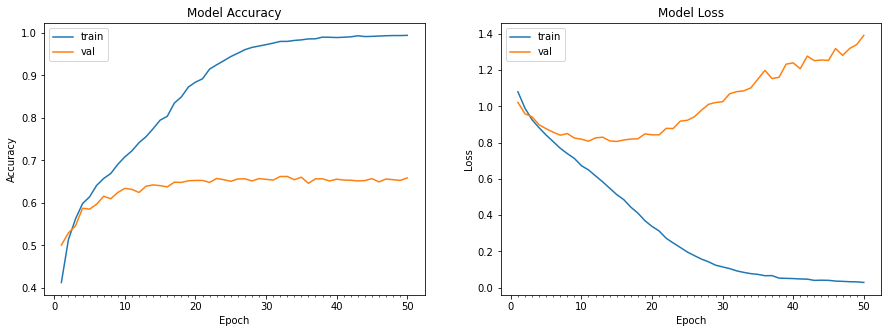

In [ ]:
def train_model(model):
  model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001, decay=1e-6),metrics=['accuracy'])
  model_info = model.fit(
          train_generator,
          steps_per_epoch=(num_train // batch_size),
          epochs=50,
          validation_data=validation_generator,
          validation_steps=(num_val // batch_size))
  model.save_weights('/content/drive/MyDrive/AML project/Final_Models/CNN_Models/CNN_8_layer_model_50_epoch_final.h5')
  plot_model_history(model_info)
  return model, model_info
model, model_info = train_model(model)


# Trained CNN Model Evaluation

## Load The Trained Model

In [ ]:
''' 
    If we donot perform evaluation immediately after training we need to load the model before evaluation 
'''

def load_model(model):
  model.load_weights('/content/drive/MyDrive/AML project/Final_Models/CNN_Models/CNN_8_layer_model_50_epoch_final.h5')

  # prevents openCL usage and unnecessary logging messages
  cv2.ocl.setUseOpenCL(False)
  return model
model = load_model(model)

## Load Test Images Data And Store Predictions

In [ ]:
emotion_dict = {0: "Angry", 1: "Happy", 2: "Sad"}

y_pred_1 = []
y_test_1 = []

for idx,emotion in enumerate(["angry", "happy", "sad"]):
  path = f"/content/drive/MyDrive/AML project/data/test/{emotion}"
  for img in tqdm(os.listdir(path)):
    frame = cv2.imread(f"{path}/{img}")
    facecasc = cv2.CascadeClassifier('/content/drive/MyDrive/AML project/haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = facecasc.detectMultiScale(gray)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (255, 0, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
        prediction = model.predict(cropped_img)
        maxindex = int(np.argmax(prediction))
        y_pred_1.append(maxindex)
        y_test_1.append(idx)


  0%|          | 0/958 [00:00<?, ?it/s]

1/1 [==============================] - 0s 112ms/step


  0%|          | 1/958 [00:00<02:57,  5.40it/s]

1/1 [==============================] - 0s 50ms/step


  0%|          | 2/958 [00:00<02:42,  5.89it/s]

1/1 [==============================] - 0s 33ms/step


  0%|          | 3/958 [00:00<02:29,  6.38it/s]

1/1 [==============================] - 0s 32ms/step


  0%|          | 4/958 [00:00<02:12,  7.19it/s]

1/1 [==============================] - 0s 33ms/step


  1%|          | 5/958 [00:00<02:12,  7.21it/s]

1/1 [==============================] - 0s 40ms/step


  1%|          | 9/958 [00:00<01:14, 12.70it/s]

1/1 [==============================] - 0s 31ms/step


  1%|          | 11/958 [00:02<04:45,  3.32it/s]

1/1 [==============================] - 0s 42ms/step


  1%|▏         | 12/958 [00:02<04:18,  3.65it/s]

1/1 [==============================] - 0s 38ms/step


  2%|▏         | 15/958 [00:02<02:46,  5.65it/s]

1/1 [==============================] - 0s 32ms/step


  2%|▏         | 17/958 [00:03<02:27,  6.37it/s]

1/1 [==============================] - 0s 32ms/step


  2%|▏         | 19/958 [00:03<02:05,  7.47it/s]

1/1 [==============================] - 0s 34ms/step


  2%|▏         | 21/958 [00:03<01:47,  8.73it/s]

1/1 [==============================] - 0s 186ms/step


  2%|▏         | 23/958 [00:03<02:04,  7.53it/s]

1/1 [==============================] - 0s 32ms/step


  3%|▎         | 25/958 [00:03<01:47,  8.67it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 36/958 [00:04<00:47, 19.45it/s]

1/1 [==============================] - 0s 45ms/step


  4%|▍         | 39/958 [00:04<00:50, 18.31it/s]

1/1 [==============================] - 0s 32ms/step


  4%|▍         | 42/958 [00:04<00:49, 18.68it/s]

1/1 [==============================] - 0s 84ms/step


  6%|▌         | 53/958 [00:05<00:40, 22.48it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▌         | 56/958 [00:05<00:50, 18.02it/s]

1/1 [==============================] - 0s 78ms/step


  6%|▌         | 59/958 [00:05<01:05, 13.62it/s]

1/1 [==============================] - 1s 538ms/step


  6%|▋         | 62/958 [00:06<01:44,  8.55it/s]

1/1 [==============================] - 0s 41ms/step


  7%|▋         | 65/958 [00:06<01:29,  9.98it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 67/958 [00:06<01:35,  9.35it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 69/958 [00:07<02:29,  5.95it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 78/958 [00:08<02:08,  6.82it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 80/958 [00:08<01:52,  7.83it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▊         | 82/958 [00:08<01:49,  7.98it/s]

1/1 [==============================] - 0s 40ms/step


  9%|▉         | 84/958 [00:08<01:36,  9.01it/s]

1/1 [==============================] - 0s 32ms/step


  9%|▉         | 87/958 [00:09<01:18, 11.07it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▉         | 89/958 [00:09<01:14, 11.74it/s]

1/1 [==============================] - 0s 193ms/step


 10%|▉         | 93/958 [00:09<01:15, 11.40it/s]

1/1 [==============================] - 0s 40ms/step


 10%|▉         | 95/958 [00:09<01:13, 11.67it/s]

1/1 [==============================] - 0s 37ms/step


 10%|█         | 97/958 [00:10<01:16, 11.30it/s]

1/1 [==============================] - 0s 45ms/step


 10%|█         | 99/958 [00:10<01:13, 11.65it/s]

1/1 [==============================] - 0s 161ms/step


 11%|█         | 103/958 [00:10<01:11, 11.96it/s]

1/1 [==============================] - 0s 43ms/step


 11%|█         | 105/958 [00:10<01:09, 12.20it/s]

1/1 [==============================] - 0s 37ms/step


 11%|█         | 107/958 [00:10<01:08, 12.41it/s]

1/1 [==============================] - 0s 39ms/step


 11%|█▏        | 110/958 [00:10<01:02, 13.65it/s]

1/1 [==============================] - 0s 35ms/step


 12%|█▏        | 112/958 [00:11<01:08, 12.37it/s]

1/1 [==============================] - 0s 34ms/step


 12%|█▏        | 114/958 [00:11<01:13, 11.43it/s]

1/1 [==============================] - 0s 210ms/step


 12%|█▏        | 117/958 [00:11<01:22, 10.21it/s]

1/1 [==============================] - 0s 37ms/step


 13%|█▎        | 122/958 [00:12<01:39,  8.36it/s]

1/1 [==============================] - 0s 41ms/step


 13%|█▎        | 124/958 [00:12<01:29,  9.33it/s]

1/1 [==============================] - 1s 566ms/step


 14%|█▎        | 130/958 [00:13<01:31,  9.04it/s]

1/1 [==============================] - 0s 32ms/step


 14%|█▍        | 132/958 [00:13<01:22, 10.00it/s]

1/1 [==============================] - 0s 34ms/step


 14%|█▍        | 134/958 [00:13<01:17, 10.66it/s]

1/1 [==============================] - 0s 35ms/step


 14%|█▍        | 137/958 [00:13<01:06, 12.38it/s]

1/1 [==============================] - 0s 33ms/step


 15%|█▍        | 140/958 [00:14<00:58, 13.99it/s]

1/1 [==============================] - 0s 32ms/step


 15%|█▍        | 142/958 [00:14<00:57, 14.19it/s]

1/1 [==============================] - 0s 32ms/step


 15%|█▌        | 144/958 [00:14<00:57, 14.09it/s]

1/1 [==============================] - 0s 133ms/step


 15%|█▌        | 146/958 [00:14<01:08, 11.89it/s]

1/1 [==============================] - 0s 36ms/step


 16%|█▌        | 149/958 [00:14<01:00, 13.42it/s]

1/1 [==============================] - 0s 35ms/step


 16%|█▌        | 151/958 [00:15<01:07, 11.88it/s]

1/1 [==============================] - 0s 38ms/step


 16%|█▌        | 154/958 [00:15<00:59, 13.41it/s]

1/1 [==============================] - 0s 33ms/step


 16%|█▋        | 156/958 [00:15<00:58, 13.81it/s]

1/1 [==============================] - 0s 38ms/step


 16%|█▋        | 158/958 [00:15<01:21,  9.83it/s]

1/1 [==============================] - 0s 34ms/step


 17%|█▋        | 160/958 [00:15<01:17, 10.34it/s]

1/1 [==============================] - 0s 34ms/step


 17%|█▋        | 162/958 [00:16<01:23,  9.57it/s]

1/1 [==============================] - 0s 47ms/step


 17%|█▋        | 164/958 [00:16<01:15, 10.53it/s]

1/1 [==============================] - 0s 230ms/step


 17%|█▋        | 166/958 [00:16<01:31,  8.63it/s]

1/1 [==============================] - 0s 36ms/step


 18%|█▊        | 168/958 [00:16<01:22,  9.59it/s]

1/1 [==============================] - 0s 33ms/step


 18%|█▊        | 170/958 [00:17<01:25,  9.19it/s]

1/1 [==============================] - 0s 37ms/step


 18%|█▊        | 172/958 [00:17<01:17, 10.12it/s]

1/1 [==============================] - 0s 32ms/step


 18%|█▊        | 174/958 [00:17<01:10, 11.09it/s]

1/1 [==============================] - 0s 31ms/step


 18%|█▊        | 176/958 [00:17<01:04, 12.05it/s]

1/1 [==============================] - 0s 32ms/step


 19%|█▊        | 178/958 [00:17<01:00, 12.86it/s]

1/1 [==============================] - 0s 36ms/step


 19%|█▉        | 180/958 [00:17<01:02, 12.40it/s]

1/1 [==============================] - 0s 468ms/step


 19%|█▉        | 182/958 [00:18<01:52,  6.91it/s]

1/1 [==============================] - 0s 40ms/step


 19%|█▉        | 184/958 [00:18<01:44,  7.44it/s]

1/1 [==============================] - 0s 44ms/step


 19%|█▉        | 185/958 [00:18<01:40,  7.67it/s]

1/1 [==============================] - 0s 40ms/step


 19%|█▉        | 186/958 [00:18<01:39,  7.78it/s]

1/1 [==============================] - 0s 35ms/step


 20%|█▉        | 187/958 [00:18<01:37,  7.94it/s]

1/1 [==============================] - 0s 35ms/step


 20%|█▉        | 191/958 [00:19<01:03, 12.13it/s]

1/1 [==============================] - 0s 35ms/step


 20%|██        | 193/958 [00:19<00:59, 12.84it/s]

1/1 [==============================] - 0s 169ms/step


 21%|██        | 197/958 [00:19<01:00, 12.48it/s]

1/1 [==============================] - 0s 44ms/step


 21%|██        | 202/958 [00:19<00:49, 15.41it/s]

1/1 [==============================] - 0s 41ms/step


 21%|██▏       | 204/958 [00:19<00:50, 14.92it/s]

1/1 [==============================] - 0s 33ms/step


 22%|██▏       | 207/958 [00:20<00:46, 16.05it/s]

1/1 [==============================] - 0s 32ms/step


 22%|██▏       | 209/958 [00:20<00:47, 15.62it/s]

1/1 [==============================] - 0s 52ms/step


 22%|██▏       | 211/958 [00:20<00:50, 14.83it/s]

1/1 [==============================] - 0s 34ms/step


 22%|██▏       | 213/958 [00:20<00:52, 14.18it/s]

1/1 [==============================] - 0s 37ms/step


 23%|██▎       | 218/958 [00:20<00:43, 17.12it/s]

1/1 [==============================] - 0s 33ms/step


 23%|██▎       | 220/958 [00:20<00:45, 16.06it/s]

1/1 [==============================] - 0s 46ms/step


 23%|██▎       | 223/958 [00:21<00:45, 16.20it/s]

1/1 [==============================] - 0s 34ms/step


 23%|██▎       | 225/958 [00:21<00:54, 13.54it/s]

1/1 [==============================] - 0s 142ms/step


 24%|██▍       | 231/958 [00:21<00:48, 15.14it/s]

1/1 [==============================] - 0s 43ms/step


 24%|██▍       | 233/958 [00:21<00:50, 14.29it/s]

1/1 [==============================] - 0s 46ms/step


 25%|██▍       | 237/958 [00:22<00:45, 15.94it/s]

1/1 [==============================] - 0s 34ms/step


 25%|██▍       | 239/958 [00:22<00:45, 15.81it/s]

1/1 [==============================] - 0s 31ms/step


 25%|██▌       | 243/958 [00:22<00:50, 14.04it/s]

1/1 [==============================] - 0s 32ms/step


 26%|██▌       | 245/958 [00:22<00:50, 14.25it/s]

1/1 [==============================] - 0s 42ms/step


 26%|██▌       | 251/958 [00:22<00:37, 18.83it/s]

1/1 [==============================] - 0s 32ms/step


 27%|██▋       | 258/958 [00:23<00:31, 22.35it/s]

1/1 [==============================] - 0s 58ms/step


 27%|██▋       | 261/958 [00:23<00:35, 19.45it/s]

1/1 [==============================] - 0s 41ms/step


 28%|██▊       | 264/958 [00:23<00:38, 18.23it/s]

1/1 [==============================] - 0s 33ms/step


 28%|██▊       | 269/958 [00:23<00:35, 19.36it/s]

1/1 [==============================] - 0s 35ms/step


 28%|██▊       | 272/958 [00:24<00:36, 18.77it/s]

1/1 [==============================] - 0s 33ms/step


 29%|██▊       | 275/958 [00:24<00:36, 18.55it/s]

1/1 [==============================] - 0s 31ms/step


 29%|██▉       | 281/958 [00:24<00:31, 21.28it/s]

1/1 [==============================] - 0s 52ms/step


 30%|██▉       | 284/958 [00:24<00:46, 14.48it/s]

1/1 [==============================] - 0s 34ms/step


 30%|██▉       | 287/958 [00:25<00:44, 15.02it/s]

1/1 [==============================] - 0s 35ms/step


 30%|███       | 289/958 [00:25<00:48, 13.93it/s]

1/1 [==============================] - 0s 38ms/step


 30%|███       | 291/958 [00:25<00:47, 14.03it/s]

1/1 [==============================] - 0s 133ms/step


 31%|███       | 293/958 [00:25<00:55, 12.08it/s]

1/1 [==============================] - 0s 38ms/step


 31%|███       | 298/958 [00:25<00:41, 15.89it/s]

1/1 [==============================] - 0s 38ms/step


 31%|███▏      | 300/958 [00:26<00:44, 14.94it/s]

1/1 [==============================] - 0s 32ms/step


 32%|███▏      | 302/958 [00:26<00:51, 12.82it/s]

1/1 [==============================] - 0s 32ms/step


 32%|███▏      | 304/958 [00:26<01:04, 10.17it/s]

1/1 [==============================] - 0s 31ms/step


 32%|███▏      | 306/958 [00:26<00:59, 10.92it/s]

1/1 [==============================] - 0s 37ms/step


 32%|███▏      | 309/958 [00:26<00:51, 12.51it/s]

1/1 [==============================] - 0s 32ms/step


 32%|███▏      | 311/958 [00:27<00:56, 11.50it/s]

1/1 [==============================] - 0s 31ms/step


 34%|███▎      | 321/958 [00:27<00:30, 20.65it/s]

1/1 [==============================] - 0s 43ms/step


 34%|███▍      | 324/958 [00:27<00:52, 12.08it/s]

1/1 [==============================] - 0s 34ms/step


 34%|███▍      | 326/958 [00:28<00:50, 12.46it/s]

1/1 [==============================] - 0s 32ms/step


 34%|███▍      | 328/958 [00:28<00:49, 12.82it/s]

1/1 [==============================] - 0s 35ms/step


 34%|███▍      | 330/958 [00:28<00:49, 12.66it/s]

1/1 [==============================] - 0s 75ms/step


 35%|███▍      | 332/958 [00:28<00:52, 12.02it/s]

1/1 [==============================] - 0s 35ms/step


 35%|███▍      | 334/958 [00:28<00:57, 10.83it/s]

1/1 [==============================] - 0s 40ms/step


 35%|███▌      | 336/958 [00:28<00:54, 11.38it/s]

1/1 [==============================] - 0s 38ms/step


 36%|███▌      | 345/958 [00:29<00:31, 19.67it/s]

1/1 [==============================] - 0s 33ms/step


 36%|███▋      | 348/958 [00:29<00:44, 13.59it/s]

1/1 [==============================] - 1s 534ms/step


 37%|███▋      | 351/958 [00:30<01:13,  8.24it/s]

1/1 [==============================] - 0s 33ms/step


 37%|███▋      | 357/958 [00:30<00:49, 12.25it/s]

1/1 [==============================] - 0s 33ms/step


 37%|███▋      | 359/958 [00:30<00:48, 12.47it/s]

1/1 [==============================] - 0s 33ms/step


 38%|███▊      | 361/958 [00:31<00:46, 12.82it/s]

1/1 [==============================] - 0s 33ms/step


 38%|███▊      | 363/958 [00:31<00:51, 11.62it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███▊      | 368/958 [00:31<00:37, 15.53it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███▊      | 370/958 [00:31<00:56, 10.46it/s]

1/1 [==============================] - 0s 39ms/step


 39%|███▉      | 376/958 [00:32<00:38, 15.27it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███▉      | 378/958 [00:32<00:38, 15.10it/s]

1/1 [==============================] - 0s 139ms/step


 40%|███▉      | 381/958 [00:32<00:43, 13.32it/s]

1/1 [==============================] - 0s 39ms/step


 40%|███▉      | 383/958 [00:32<00:49, 11.66it/s]

1/1 [==============================] - 0s 35ms/step


 40%|████      | 385/958 [00:32<00:47, 12.13it/s]

1/1 [==============================] - 0s 34ms/step


 40%|████      | 387/958 [00:33<00:46, 12.37it/s]

1/1 [==============================] - 0s 43ms/step


 41%|████      | 393/958 [00:33<00:32, 17.33it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████▏     | 396/958 [00:33<00:32, 17.51it/s]

1/1 [==============================] - 0s 110ms/step


 42%|████▏     | 400/958 [00:33<00:35, 15.52it/s]

1/1 [==============================] - 0s 39ms/step


 42%|████▏     | 402/958 [00:33<00:36, 15.33it/s]

1/1 [==============================] - 0s 38ms/step


 42%|████▏     | 406/958 [00:34<00:33, 16.42it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 408/958 [00:34<00:34, 16.09it/s]

1/1 [==============================] - 0s 210ms/step


 43%|████▎     | 410/958 [00:34<00:51, 10.58it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████▎     | 413/958 [00:34<00:44, 12.14it/s]

1/1 [==============================] - 0s 54ms/step


 43%|████▎     | 415/958 [00:35<00:44, 12.31it/s]

1/1 [==============================] - 0s 36ms/step


 44%|████▎     | 418/958 [00:35<00:40, 13.50it/s]

1/1 [==============================] - 0s 267ms/step


 44%|████▍     | 424/958 [00:35<00:39, 13.50it/s]

1/1 [==============================] - 0s 38ms/step


 44%|████▍     | 426/958 [00:36<01:17,  6.83it/s]

1/1 [==============================] - 0s 34ms/step


 45%|████▍     | 428/958 [00:36<01:14,  7.16it/s]

1/1 [==============================] - 0s 32ms/step


 45%|████▍     | 431/958 [00:36<00:58,  9.01it/s]

1/1 [==============================] - 0s 38ms/step


 46%|████▌     | 441/958 [00:37<00:29, 17.28it/s]

1/1 [==============================] - 0s 160ms/step


 47%|████▋     | 450/958 [00:37<00:28, 17.65it/s]

1/1 [==============================] - 0s 33ms/step


 48%|████▊     | 460/958 [00:38<00:23, 21.22it/s]

1/1 [==============================] - 0s 32ms/step


 48%|████▊     | 463/958 [00:38<00:32, 15.15it/s]

1/1 [==============================] - 1s 542ms/step


 49%|████▉     | 469/958 [00:39<00:44, 11.06it/s]

1/1 [==============================] - 0s 40ms/step


 49%|████▉     | 472/958 [00:39<00:39, 12.24it/s]

1/1 [==============================] - 0s 34ms/step


 50%|████▉     | 475/958 [00:39<00:36, 13.30it/s]

1/1 [==============================] - 0s 38ms/step


 50%|████▉     | 478/958 [00:40<00:33, 14.44it/s]

1/1 [==============================] - 0s 33ms/step


 50%|█████     | 480/958 [00:40<00:33, 14.42it/s]

1/1 [==============================] - 0s 32ms/step


 50%|█████     | 482/958 [00:40<00:33, 14.21it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████     | 484/958 [00:40<00:33, 14.09it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 489/958 [00:40<00:34, 13.56it/s]

1/1 [==============================] - 0s 33ms/step


 51%|█████▏    | 492/958 [00:41<00:32, 14.50it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 503/958 [00:41<00:26, 17.05it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 505/958 [00:41<00:27, 16.27it/s]

1/1 [==============================] - 0s 451ms/step


 53%|█████▎    | 508/958 [00:42<00:46,  9.62it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 510/958 [00:42<00:43, 10.37it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████▎    | 513/958 [00:42<00:37, 12.00it/s]

1/1 [==============================] - 0s 46ms/step


 54%|█████▍    | 515/958 [00:42<00:36, 12.15it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████▍    | 519/958 [00:43<00:30, 14.59it/s]

1/1 [==============================] - 0s 30ms/step


 54%|█████▍    | 521/958 [00:43<00:29, 14.67it/s]

1/1 [==============================] - 0s 41ms/step


 55%|█████▍    | 523/958 [00:43<00:29, 14.58it/s]

1/1 [==============================] - 0s 224ms/step


 55%|█████▌    | 530/958 [00:43<00:26, 16.04it/s]

1/1 [==============================] - 0s 45ms/step


 56%|█████▌    | 533/958 [00:43<00:26, 16.18it/s]

1/1 [==============================] - 0s 39ms/step


 56%|█████▋    | 539/958 [00:44<00:21, 19.18it/s]

1/1 [==============================] - 0s 129ms/step


 57%|█████▋    | 546/958 [00:44<00:23, 17.76it/s]

1/1 [==============================] - 1s 594ms/step


 57%|█████▋    | 549/958 [00:45<00:44,  9.17it/s]

1/1 [==============================] - 0s 41ms/step


 58%|█████▊    | 551/958 [00:45<00:41,  9.82it/s]

1/1 [==============================] - 0s 36ms/step


 58%|█████▊    | 557/958 [00:45<00:30, 13.16it/s]

1/1 [==============================] - 0s 33ms/step


 58%|█████▊    | 559/958 [00:46<00:29, 13.55it/s]

1/1 [==============================] - 0s 33ms/step


 59%|█████▉    | 563/958 [00:46<00:25, 15.47it/s]

1/1 [==============================] - 0s 37ms/step


 59%|█████▉    | 565/958 [00:46<00:26, 14.84it/s]

1/1 [==============================] - 0s 62ms/step


 59%|█████▉    | 569/958 [00:46<00:24, 15.66it/s]

1/1 [==============================] - 0s 35ms/step


 60%|█████▉    | 571/958 [00:46<00:26, 14.81it/s]

1/1 [==============================] - 0s 32ms/step


 60%|█████▉    | 573/958 [00:47<00:26, 14.43it/s]

1/1 [==============================] - 0s 32ms/step


 60%|██████    | 579/958 [00:47<00:20, 18.79it/s]

1/1 [==============================] - 0s 32ms/step


 61%|██████▏   | 587/958 [00:47<00:20, 18.44it/s]

1/1 [==============================] - 0s 37ms/step


 62%|██████▏   | 597/958 [00:48<00:15, 23.06it/s]

1/1 [==============================] - 0s 141ms/step


 63%|██████▎   | 601/958 [00:48<00:19, 18.41it/s]

1/1 [==============================] - 0s 35ms/step


 63%|██████▎   | 605/958 [00:48<00:18, 18.94it/s]

1/1 [==============================] - 0s 33ms/step


 63%|██████▎   | 608/958 [00:48<00:19, 17.85it/s]

1/1 [==============================] - 0s 40ms/step


 64%|██████▎   | 610/958 [00:49<00:20, 16.61it/s]

1/1 [==============================] - 0s 36ms/step


 64%|██████▍   | 612/958 [00:49<00:24, 14.00it/s]

1/1 [==============================] - 0s 31ms/step


 64%|██████▍   | 615/958 [00:49<00:22, 15.09it/s]

1/1 [==============================] - 0s 38ms/step


 65%|██████▍   | 622/958 [00:50<00:44,  7.54it/s]

1/1 [==============================] - 0s 34ms/step


 65%|██████▌   | 624/958 [00:50<00:39,  8.52it/s]

1/1 [==============================] - 0s 41ms/step


 65%|██████▌   | 626/958 [00:50<00:36,  9.15it/s]

1/1 [==============================] - 0s 32ms/step


 66%|██████▌   | 628/958 [00:50<00:32, 10.14it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████▌   | 630/958 [00:51<00:29, 11.08it/s]

1/1 [==============================] - 0s 34ms/step


 67%|██████▋   | 638/958 [00:51<00:23, 13.78it/s]

1/1 [==============================] - 0s 38ms/step


 67%|██████▋   | 640/958 [00:51<00:23, 13.51it/s]

1/1 [==============================] - 0s 33ms/step


 67%|██████▋   | 645/958 [00:52<00:34,  8.98it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 647/958 [00:52<00:34,  8.92it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 651/958 [00:53<00:25, 11.87it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████▊   | 653/958 [00:53<00:25, 12.17it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 655/958 [00:53<00:28, 10.56it/s]

1/1 [==============================] - 0s 34ms/step


 69%|██████▊   | 657/958 [00:53<00:35,  8.38it/s]

1/1 [==============================] - 0s 45ms/step


 69%|██████▉   | 661/958 [00:54<00:27, 10.97it/s]

1/1 [==============================] - 0s 38ms/step


 69%|██████▉   | 663/958 [00:54<00:25, 11.58it/s]

1/1 [==============================] - 0s 177ms/step


 70%|██████▉   | 668/958 [00:54<00:25, 11.50it/s]

1/1 [==============================] - 0s 41ms/step


 70%|██████▉   | 670/958 [00:54<00:24, 11.67it/s]

1/1 [==============================] - 0s 31ms/step


 70%|███████   | 672/958 [00:55<00:26, 10.66it/s]

1/1 [==============================] - 0s 34ms/step


 70%|███████   | 674/958 [00:55<00:25, 11.34it/s]

1/1 [==============================] - 0s 36ms/step


 71%|███████   | 680/958 [00:55<00:16, 16.60it/s]

1/1 [==============================] - 0s 79ms/step


 71%|███████   | 682/958 [00:55<00:18, 14.55it/s]

1/1 [==============================] - 0s 36ms/step


 71%|███████▏  | 684/958 [00:55<00:19, 14.10it/s]

1/1 [==============================] - 0s 33ms/step


 72%|███████▏  | 693/958 [00:56<00:12, 21.39it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 700/958 [00:56<00:11, 23.41it/s]

1/1 [==============================] - 0s 33ms/step


 73%|███████▎  | 703/958 [00:56<00:14, 17.79it/s]

1/1 [==============================] - 0s 35ms/step


 74%|███████▎  | 706/958 [00:56<00:14, 17.44it/s]

1/1 [==============================] - 0s 35ms/step


 74%|███████▍  | 708/958 [00:57<00:15, 15.69it/s]

1/1 [==============================] - 0s 36ms/step


 74%|███████▍  | 710/958 [00:57<00:15, 15.58it/s]

1/1 [==============================] - 0s 31ms/step


 74%|███████▍  | 712/958 [00:57<00:20, 12.03it/s]

1/1 [==============================] - 0s 33ms/step


 75%|███████▍  | 714/958 [00:57<00:19, 12.20it/s]

1/1 [==============================] - 0s 36ms/step


 75%|███████▍  | 718/958 [00:57<00:16, 14.53it/s]

1/1 [==============================] - 0s 32ms/step


 75%|███████▌  | 720/958 [00:58<00:16, 14.56it/s]

1/1 [==============================] - 0s 39ms/step


 76%|███████▌  | 730/958 [00:58<00:10, 22.46it/s]

1/1 [==============================] - 0s 82ms/step


 77%|███████▋  | 733/958 [00:58<00:13, 16.88it/s]

1/1 [==============================] - 0s 34ms/step


 77%|███████▋  | 736/958 [00:58<00:13, 16.28it/s]

1/1 [==============================] - 0s 34ms/step


 77%|███████▋  | 740/958 [00:59<00:12, 17.18it/s]

1/1 [==============================] - 0s 36ms/step


 77%|███████▋  | 742/958 [00:59<00:13, 16.26it/s]

1/1 [==============================] - 0s 32ms/step


 78%|███████▊  | 744/958 [00:59<00:13, 15.77it/s]

1/1 [==============================] - 0s 72ms/step


 78%|███████▊  | 746/958 [00:59<00:15, 14.02it/s]

1/1 [==============================] - 0s 32ms/step


 78%|███████▊  | 748/958 [00:59<00:17, 11.98it/s]

1/1 [==============================] - 0s 32ms/step


 78%|███████▊  | 750/958 [00:59<00:16, 12.54it/s]

1/1 [==============================] - 0s 42ms/step


 79%|███████▊  | 753/958 [01:00<00:14, 13.70it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▉  | 759/958 [01:00<00:11, 17.29it/s]

1/1 [==============================] - 0s 35ms/step


 79%|███████▉  | 761/958 [01:00<00:14, 13.88it/s]

1/1 [==============================] - 0s 38ms/step


 80%|███████▉  | 763/958 [01:00<00:14, 13.26it/s]

1/1 [==============================] - 0s 33ms/step


 80%|███████▉  | 765/958 [01:00<00:14, 13.79it/s]

1/1 [==============================] - 0s 32ms/step


 80%|████████  | 767/958 [01:01<00:14, 13.11it/s]

1/1 [==============================] - 0s 31ms/step


 80%|████████  | 771/958 [01:01<00:11, 15.72it/s]

1/1 [==============================] - 0s 32ms/step


 81%|████████  | 773/958 [01:01<00:11, 15.63it/s]

1/1 [==============================] - 0s 117ms/step


 81%|████████  | 777/958 [01:01<00:11, 15.26it/s]

1/1 [==============================] - 0s 31ms/step


 81%|████████▏ | 780/958 [01:01<00:11, 15.69it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████▏ | 782/958 [01:02<00:11, 15.38it/s]

1/1 [==============================] - 0s 32ms/step


 82%|████████▏ | 784/958 [01:02<00:11, 15.30it/s]

1/1 [==============================] - 0s 36ms/step


 82%|████████▏ | 786/958 [01:02<00:11, 14.90it/s]

1/1 [==============================] - 0s 65ms/step


 82%|████████▏ | 788/958 [01:02<00:14, 11.99it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████▎ | 792/958 [01:02<00:11, 14.60it/s]

1/1 [==============================] - 0s 32ms/step


 83%|████████▎ | 795/958 [01:02<00:10, 15.34it/s]

1/1 [==============================] - 0s 38ms/step


 83%|████████▎ | 797/958 [01:03<00:12, 12.85it/s]

1/1 [==============================] - 0s 30ms/step


 84%|████████▎ | 800/958 [01:03<00:10, 14.49it/s]

1/1 [==============================] - 0s 32ms/step


 84%|████████▍ | 803/958 [01:03<00:10, 14.73it/s]

1/1 [==============================] - 0s 30ms/step


 84%|████████▍ | 805/958 [01:03<00:10, 14.67it/s]

1/1 [==============================] - 0s 31ms/step


 84%|████████▍ | 808/958 [01:03<00:09, 15.34it/s]

1/1 [==============================] - 0s 31ms/step


 85%|████████▍ | 810/958 [01:04<00:10, 13.89it/s]

1/1 [==============================] - 0s 32ms/step


 85%|████████▍ | 812/958 [01:04<00:10, 14.14it/s]

1/1 [==============================] - 0s 32ms/step


 85%|████████▌ | 815/958 [01:04<00:09, 14.32it/s]

1/1 [==============================] - 0s 32ms/step


 85%|████████▌ | 818/958 [01:04<00:09, 15.15it/s]

1/1 [==============================] - 1s 521ms/step


 86%|████████▌ | 820/958 [01:05<00:20,  6.67it/s]

1/1 [==============================] - 0s 36ms/step


 86%|████████▌ | 822/958 [01:05<00:18,  7.46it/s]

1/1 [==============================] - 0s 35ms/step


 86%|████████▌ | 825/958 [01:05<00:14,  9.36it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▋ | 828/958 [01:05<00:11, 11.10it/s]

1/1 [==============================] - 0s 32ms/step


 87%|████████▋ | 832/958 [01:06<00:09, 13.54it/s]

1/1 [==============================] - 0s 32ms/step


 87%|████████▋ | 836/958 [01:06<00:08, 15.14it/s]

1/1 [==============================] - 0s 171ms/step


 88%|████████▊ | 840/958 [01:06<00:08, 13.81it/s]

1/1 [==============================] - 0s 36ms/step


 88%|████████▊ | 842/958 [01:06<00:08, 13.51it/s]

1/1 [==============================] - 0s 35ms/step


 88%|████████▊ | 844/958 [01:06<00:08, 13.57it/s]

1/1 [==============================] - 0s 32ms/step


 88%|████████▊ | 847/958 [01:07<00:07, 14.34it/s]

1/1 [==============================] - 0s 172ms/step


 89%|████████▉ | 851/958 [01:07<00:08, 13.14it/s]

1/1 [==============================] - 0s 39ms/step


 89%|████████▉ | 853/958 [01:07<00:08, 13.08it/s]

1/1 [==============================] - 0s 40ms/step


 89%|████████▉ | 855/958 [01:07<00:07, 12.89it/s]

1/1 [==============================] - 0s 32ms/step


 90%|████████▉ | 861/958 [01:08<00:05, 17.32it/s]

1/1 [==============================] - 0s 35ms/step


 91%|█████████ | 867/958 [01:08<00:05, 18.07it/s]

1/1 [==============================] - 0s 153ms/step


 91%|█████████ | 870/958 [01:08<00:05, 14.87it/s]

1/1 [==============================] - 0s 31ms/step


 91%|█████████ | 872/958 [01:08<00:05, 14.56it/s]

1/1 [==============================] - 0s 32ms/step


 91%|█████████ | 874/958 [01:09<00:05, 14.23it/s]

1/1 [==============================] - 0s 35ms/step


 92%|█████████▏| 877/958 [01:09<00:05, 14.65it/s]

1/1 [==============================] - 0s 35ms/step


 92%|█████████▏| 882/958 [01:09<00:04, 17.11it/s]

1/1 [==============================] - 0s 31ms/step


 92%|█████████▏| 884/958 [01:09<00:05, 13.08it/s]

1/1 [==============================] - 0s 41ms/step


 93%|█████████▎| 890/958 [01:10<00:03, 17.71it/s]

1/1 [==============================] - 0s 41ms/step


 93%|█████████▎| 893/958 [01:10<00:06, 10.12it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 895/958 [01:10<00:05, 10.61it/s]

1/1 [==============================] - 0s 34ms/step


 94%|█████████▎| 898/958 [01:10<00:05, 11.57it/s]

1/1 [==============================] - 0s 34ms/step


 94%|█████████▍| 900/958 [01:11<00:05, 10.52it/s]

1/1 [==============================] - 0s 31ms/step


 95%|█████████▍| 907/958 [01:11<00:03, 16.11it/s]

1/1 [==============================] - 0s 114ms/step


 95%|█████████▍| 909/958 [01:11<00:03, 13.69it/s]

1/1 [==============================] - 0s 35ms/step


 95%|█████████▌| 911/958 [01:11<00:03, 13.24it/s]

1/1 [==============================] - 0s 41ms/step


 95%|█████████▌| 913/958 [01:12<00:04, 11.22it/s]

1/1 [==============================] - 0s 34ms/step


 96%|█████████▌| 915/958 [01:12<00:03, 11.78it/s]

1/1 [==============================] - 0s 68ms/step


 96%|█████████▌| 920/958 [01:12<00:02, 13.46it/s]

1/1 [==============================] - 1s 529ms/step


 96%|█████████▋| 923/958 [01:13<00:04,  7.92it/s]

1/1 [==============================] - 0s 32ms/step


 97%|█████████▋| 933/958 [01:13<00:01, 16.34it/s]

1/1 [==============================] - 0s 38ms/step


 98%|█████████▊| 936/958 [01:13<00:01, 14.54it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 938/958 [01:14<00:01, 12.62it/s]

1/1 [==============================] - 0s 38ms/step


 98%|█████████▊| 942/958 [01:14<00:01, 14.56it/s]

1/1 [==============================] - 1s 790ms/step


 99%|█████████▊| 945/958 [01:15<00:01,  7.19it/s]

1/1 [==============================] - 0s 32ms/step


 99%|█████████▉| 947/958 [01:15<00:01,  6.57it/s]

1/1 [==============================] - 0s 33ms/step


 99%|█████████▉| 949/958 [01:15<00:01,  7.38it/s]

1/1 [==============================] - 0s 32ms/step


  0%|          | 0/958 [00:00<?, ?it/s]

1/1 [==============================] - 0s 41ms/step


  0%|          | 1/958 [00:00<02:07,  7.48it/s]

1/1 [==============================] - 0s 48ms/step


  1%|          | 5/958 [00:00<00:58, 16.33it/s]

1/1 [==============================] - 0s 32ms/step


  1%|          | 9/958 [00:00<00:52, 18.00it/s]

1/1 [==============================] - 1s 567ms/step


  1%|          | 11/958 [00:01<03:27,  4.56it/s]

1/1 [==============================] - 0s 33ms/step


  1%|▏         | 13/958 [00:02<03:20,  4.71it/s]

1/1 [==============================] - 1s 566ms/step


  1%|▏         | 14/958 [00:02<04:36,  3.42it/s]

1/1 [==============================] - 0s 39ms/step


  2%|▏         | 18/958 [00:03<02:42,  5.77it/s]

1/1 [==============================] - 0s 44ms/step


  2%|▏         | 20/958 [00:03<02:18,  6.75it/s]

1/1 [==============================] - 0s 33ms/step


  2%|▏         | 22/958 [00:03<02:01,  7.73it/s]

1/1 [==============================] - 0s 31ms/step


  3%|▎         | 26/958 [00:03<01:28, 10.54it/s]

1/1 [==============================] - 0s 35ms/step


  3%|▎         | 31/958 [00:03<01:06, 14.03it/s]

1/1 [==============================] - 0s 126ms/step


  4%|▎         | 35/958 [00:04<01:08, 13.56it/s]

1/1 [==============================] - 1s 551ms/step


  4%|▍         | 37/958 [00:04<02:00,  7.62it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 39/958 [00:04<01:46,  8.64it/s]

1/1 [==============================] - 0s 32ms/step


  4%|▍         | 41/958 [00:05<01:45,  8.72it/s]

1/1 [==============================] - 0s 32ms/step


  4%|▍         | 43/958 [00:05<01:44,  8.78it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▍         | 46/958 [00:05<01:26, 10.49it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▌         | 48/958 [00:05<01:21, 11.16it/s]

1/1 [==============================] - 0s 207ms/step


  5%|▌         | 50/958 [00:06<01:39,  9.11it/s]

1/1 [==============================] - 0s 32ms/step


  5%|▌         | 52/958 [00:06<01:30, 10.00it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 54/958 [00:06<01:25, 10.57it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 57/958 [00:06<01:13, 12.30it/s]

1/1 [==============================] - 0s 119ms/step


  6%|▌         | 59/958 [00:06<01:30,  9.94it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▋         | 61/958 [00:07<01:25, 10.44it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 63/958 [00:07<01:19, 11.24it/s]

1/1 [==============================] - 0s 40ms/step


  7%|▋         | 69/958 [00:07<01:01, 14.52it/s]

1/1 [==============================] - 0s 32ms/step


  7%|▋         | 71/958 [00:07<01:11, 12.46it/s]

1/1 [==============================] - 0s 39ms/step


  8%|▊         | 73/958 [00:07<01:08, 12.89it/s]

1/1 [==============================] - 0s 55ms/step


  8%|▊         | 76/958 [00:08<01:04, 13.57it/s]

1/1 [==============================] - 1s 545ms/step


  8%|▊         | 78/958 [00:08<02:01,  7.22it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 80/958 [00:09<01:57,  7.46it/s]

1/1 [==============================] - 0s 43ms/step


  9%|▊         | 82/958 [00:09<01:43,  8.46it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▉         | 84/958 [00:09<01:40,  8.65it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▉         | 90/958 [00:09<01:06, 13.07it/s]

1/1 [==============================] - 0s 37ms/step


 10%|▉         | 95/958 [00:10<00:54, 15.71it/s]

1/1 [==============================] - 0s 38ms/step


 10%|█         | 99/958 [00:10<00:50, 17.08it/s]

1/1 [==============================] - 0s 33ms/step


 11%|█         | 101/958 [00:10<01:46,  8.03it/s]

1/1 [==============================] - 0s 33ms/step


 11%|█         | 104/958 [00:11<01:30,  9.41it/s]

1/1 [==============================] - 0s 33ms/step


 11%|█         | 106/958 [00:11<01:32,  9.16it/s]

1/1 [==============================] - 0s 33ms/step


 11%|█▏        | 108/958 [00:11<01:32,  9.18it/s]

1/1 [==============================] - 0s 35ms/step


 12%|█▏        | 111/958 [00:11<01:17, 10.97it/s]

1/1 [==============================] - 0s 206ms/step


 12%|█▏        | 114/958 [00:12<01:23, 10.09it/s]

1/1 [==============================] - 0s 41ms/step


 13%|█▎        | 123/958 [00:13<01:12, 11.56it/s]

1/1 [==============================] - 0s 35ms/step


 13%|█▎        | 125/958 [00:13<01:16, 10.88it/s]

1/1 [==============================] - 0s 39ms/step


 13%|█▎        | 127/958 [00:13<01:13, 11.34it/s]

1/1 [==============================] - 0s 33ms/step


 13%|█▎        | 129/958 [00:13<01:20, 10.28it/s]

1/1 [==============================] - 0s 38ms/step


 14%|█▍        | 132/958 [00:13<01:09, 11.90it/s]

1/1 [==============================] - 0s 103ms/step


 14%|█▍        | 134/958 [00:14<01:13, 11.20it/s]

1/1 [==============================] - 0s 42ms/step


 14%|█▍        | 136/958 [00:14<01:11, 11.55it/s]

1/1 [==============================] - 0s 476ms/step


 14%|█▍        | 138/958 [00:14<01:59,  6.89it/s]

1/1 [==============================] - 0s 42ms/step


 15%|█▍        | 139/958 [00:14<01:55,  7.09it/s]

1/1 [==============================] - 0s 33ms/step


 15%|█▍        | 140/958 [00:15<01:53,  7.22it/s]

1/1 [==============================] - 0s 36ms/step


 15%|█▍        | 141/958 [00:15<01:54,  7.14it/s]

1/1 [==============================] - 1s 519ms/step


 15%|█▍        | 142/958 [00:15<03:24,  3.99it/s]

1/1 [==============================] - 0s 34ms/step


 15%|█▌        | 144/958 [00:15<02:27,  5.53it/s]

1/1 [==============================] - 0s 45ms/step


 16%|█▌        | 149/958 [00:16<01:17, 10.39it/s]

1/1 [==============================] - 0s 32ms/step


 16%|█▌        | 151/958 [00:16<01:11, 11.23it/s]

1/1 [==============================] - 0s 35ms/step


 16%|█▌        | 153/958 [00:16<01:17, 10.35it/s]

1/1 [==============================] - 0s 32ms/step


 16%|█▋        | 156/958 [00:16<01:05, 12.32it/s]

1/1 [==============================] - 0s 31ms/step


 16%|█▋        | 158/958 [00:16<01:03, 12.66it/s]

1/1 [==============================] - 0s 65ms/step


 17%|█▋        | 163/958 [00:17<00:53, 14.95it/s]

1/1 [==============================] - 0s 35ms/step


 17%|█▋        | 165/958 [00:17<01:01, 12.81it/s]

1/1 [==============================] - 0s 34ms/step


 18%|█▊        | 169/958 [00:17<00:53, 14.68it/s]

1/1 [==============================] - 0s 45ms/step


 18%|█▊        | 175/958 [00:18<00:45, 17.02it/s]

1/1 [==============================] - 0s 40ms/step


 19%|█▉        | 180/958 [00:18<00:42, 18.33it/s]

1/1 [==============================] - 0s 44ms/step


 19%|█▉        | 183/958 [00:18<00:44, 17.39it/s]

1/1 [==============================] - 0s 34ms/step


 19%|█▉        | 185/958 [00:18<00:49, 15.51it/s]

1/1 [==============================] - 0s 118ms/step


 20%|█▉        | 187/958 [00:18<01:00, 12.82it/s]

1/1 [==============================] - 0s 46ms/step


 20%|█▉        | 189/958 [00:19<01:00, 12.70it/s]

1/1 [==============================] - 0s 35ms/step


 20%|█▉        | 191/958 [00:19<01:00, 12.61it/s]

1/1 [==============================] - 0s 37ms/step


 21%|██        | 197/958 [00:19<00:44, 17.12it/s]

1/1 [==============================] - 0s 33ms/step


 21%|██        | 199/958 [00:19<00:47, 16.02it/s]

1/1 [==============================] - 0s 34ms/step


 21%|██        | 201/958 [00:19<00:49, 15.15it/s]

1/1 [==============================] - 0s 153ms/step


 21%|██▏       | 205/958 [00:20<00:53, 14.02it/s]

1/1 [==============================] - 0s 46ms/step


 22%|██▏       | 210/958 [00:20<00:45, 16.30it/s]

1/1 [==============================] - 0s 33ms/step


 22%|██▏       | 212/958 [00:20<00:48, 15.36it/s]

1/1 [==============================] - 0s 36ms/step


 22%|██▏       | 214/958 [00:20<00:49, 14.89it/s]

1/1 [==============================] - 0s 38ms/step


 23%|██▎       | 216/958 [00:20<00:50, 14.56it/s]

1/1 [==============================] - 0s 62ms/step


 23%|██▎       | 218/958 [00:21<00:54, 13.58it/s]

1/1 [==============================] - 0s 47ms/step


 23%|██▎       | 221/958 [00:21<00:51, 14.44it/s]

1/1 [==============================] - 0s 32ms/step


 23%|██▎       | 224/958 [00:21<00:50, 14.53it/s]

1/1 [==============================] - 0s 32ms/step


 24%|██▎       | 226/958 [00:21<00:51, 14.28it/s]

1/1 [==============================] - 0s 36ms/step


 24%|██▍       | 229/958 [00:21<00:49, 14.87it/s]

1/1 [==============================] - 0s 231ms/step


 24%|██▍       | 231/958 [00:22<01:07, 10.70it/s]

1/1 [==============================] - 0s 50ms/step


 24%|██▍       | 233/958 [00:22<01:05, 11.01it/s]

1/1 [==============================] - 0s 48ms/step


 25%|██▍       | 235/958 [00:22<01:02, 11.60it/s]

1/1 [==============================] - 0s 33ms/step


 25%|██▍       | 237/958 [00:22<01:01, 11.69it/s]

1/1 [==============================] - 0s 31ms/step


 25%|██▍       | 239/958 [00:22<00:58, 12.27it/s]

1/1 [==============================] - 0s 32ms/step


 25%|██▌       | 241/958 [00:22<00:55, 12.81it/s]

1/1 [==============================] - 0s 117ms/step


 25%|██▌       | 243/958 [00:23<01:12,  9.89it/s]

1/1 [==============================] - 1s 577ms/step


 26%|██▌       | 245/958 [00:23<02:05,  5.69it/s]

1/1 [==============================] - 0s 45ms/step


 26%|██▌       | 246/958 [00:24<02:04,  5.71it/s]

1/1 [==============================] - 0s 48ms/step


 26%|██▌       | 248/958 [00:24<01:43,  6.86it/s]

1/1 [==============================] - 1s 542ms/step


 26%|██▌       | 249/958 [00:24<02:49,  4.18it/s]

1/1 [==============================] - 0s 34ms/step


 26%|██▌       | 250/958 [00:24<02:31,  4.67it/s]

1/1 [==============================] - 0s 36ms/step


 26%|██▋       | 252/958 [00:25<01:53,  6.23it/s]

1/1 [==============================] - 0s 34ms/step


 27%|██▋       | 255/958 [00:25<01:21,  8.60it/s]

1/1 [==============================] - 0s 35ms/step


 27%|██▋       | 257/958 [00:25<01:22,  8.46it/s]

1/1 [==============================] - 0s 33ms/step


 27%|██▋       | 259/958 [00:25<01:12,  9.58it/s]

1/1 [==============================] - 0s 35ms/step


 27%|██▋       | 261/958 [00:25<01:18,  8.90it/s]

1/1 [==============================] - 1s 717ms/step


 28%|██▊       | 265/958 [00:26<01:52,  6.16it/s]

1/1 [==============================] - 0s 186ms/step


 28%|██▊       | 266/958 [00:27<02:03,  5.62it/s]

1/1 [==============================] - 1s 627ms/step


 28%|██▊       | 269/958 [00:27<02:23,  4.80it/s]

1/1 [==============================] - 0s 45ms/step


 28%|██▊       | 271/958 [00:28<01:59,  5.76it/s]

1/1 [==============================] - 0s 34ms/step


 28%|██▊       | 272/958 [00:28<01:52,  6.09it/s]

1/1 [==============================] - 0s 35ms/step


 28%|██▊       | 273/958 [00:28<01:51,  6.15it/s]

1/1 [==============================] - 0s 35ms/step


 29%|██▊       | 274/958 [00:28<01:43,  6.62it/s]

1/1 [==============================] - 0s 36ms/step


 29%|██▊       | 275/958 [00:28<01:39,  6.85it/s]

1/1 [==============================] - 0s 36ms/step


 29%|██▉       | 276/958 [00:28<01:33,  7.32it/s]

1/1 [==============================] - 0s 136ms/step


 29%|██▉       | 279/958 [00:28<01:20,  8.46it/s]

1/1 [==============================] - 0s 41ms/step


 29%|██▉       | 281/958 [00:29<01:11,  9.44it/s]

1/1 [==============================] - 0s 36ms/step


 29%|██▉       | 282/958 [00:29<01:12,  9.33it/s]

1/1 [==============================] - 0s 35ms/step


 30%|██▉       | 284/958 [00:29<01:05, 10.36it/s]

1/1 [==============================] - 0s 36ms/step


 30%|██▉       | 287/958 [00:29<00:54, 12.27it/s]

1/1 [==============================] - 0s 37ms/step


 30%|███       | 289/958 [00:29<00:53, 12.59it/s]

1/1 [==============================] - 0s 34ms/step


 31%|███       | 293/958 [00:30<00:55, 11.89it/s]

1/1 [==============================] - 0s 37ms/step


 31%|███       | 296/958 [00:30<00:49, 13.32it/s]

1/1 [==============================] - 0s 36ms/step


 31%|███       | 299/958 [00:30<00:45, 14.36it/s]

1/1 [==============================] - 0s 33ms/step


 32%|███▏      | 305/958 [00:30<00:39, 16.59it/s]

1/1 [==============================] - 0s 201ms/step


 32%|███▏      | 307/958 [00:31<00:53, 12.14it/s]

1/1 [==============================] - 1s 521ms/step


 32%|███▏      | 310/958 [00:31<01:23,  7.77it/s]

1/1 [==============================] - 0s 34ms/step


 33%|███▎      | 313/958 [00:31<01:09,  9.34it/s]

1/1 [==============================] - 0s 35ms/step


 33%|███▎      | 315/958 [00:32<01:10,  9.11it/s]

1/1 [==============================] - 0s 33ms/step


 33%|███▎      | 317/958 [00:32<01:04,  9.90it/s]

1/1 [==============================] - 0s 33ms/step


 33%|███▎      | 319/958 [00:32<01:05,  9.71it/s]

1/1 [==============================] - 0s 32ms/step


 34%|███▎      | 322/958 [00:32<00:55, 11.54it/s]

1/1 [==============================] - 0s 31ms/step


 34%|███▍      | 324/958 [00:32<00:52, 12.18it/s]

1/1 [==============================] - 0s 69ms/step


 34%|███▍      | 326/958 [00:33<00:54, 11.62it/s]

1/1 [==============================] - 0s 37ms/step


 34%|███▍      | 330/958 [00:33<01:31,  6.88it/s]

1/1 [==============================] - 0s 34ms/step


 35%|███▍      | 332/958 [00:34<01:20,  7.77it/s]

1/1 [==============================] - 0s 35ms/step


 35%|███▌      | 337/958 [00:34<00:50, 12.22it/s]

1/1 [==============================] - 0s 33ms/step


 35%|███▌      | 339/958 [00:34<00:49, 12.47it/s]

1/1 [==============================] - 0s 38ms/step


 36%|███▌      | 342/958 [00:34<00:44, 13.81it/s]

1/1 [==============================] - 0s 39ms/step


 36%|███▋      | 348/958 [00:34<00:35, 17.39it/s]

1/1 [==============================] - 0s 34ms/step


 37%|███▋      | 350/958 [00:35<00:36, 16.48it/s]

1/1 [==============================] - 1s 708ms/step


 37%|███▋      | 352/958 [00:35<01:30,  6.67it/s]

1/1 [==============================] - 0s 35ms/step


 37%|███▋      | 354/958 [00:36<01:38,  6.16it/s]

1/1 [==============================] - 0s 34ms/step


 37%|███▋      | 356/958 [00:36<01:23,  7.23it/s]

1/1 [==============================] - 0s 33ms/step


 38%|███▊      | 367/958 [00:36<00:35, 16.79it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███▊      | 370/958 [00:37<00:55, 10.63it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▉      | 372/958 [00:37<00:52, 11.15it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 378/958 [00:37<00:37, 15.40it/s]

1/1 [==============================] - 0s 38ms/step


 40%|███▉      | 381/958 [00:38<00:48, 11.86it/s]

1/1 [==============================] - 0s 493ms/step


 40%|████      | 384/958 [00:38<01:11,  8.07it/s]

1/1 [==============================] - 0s 33ms/step


 40%|████      | 387/958 [00:38<01:00,  9.39it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████      | 390/958 [00:39<00:52, 10.80it/s]

1/1 [==============================] - 1s 508ms/step


 41%|████      | 392/958 [00:39<01:19,  7.13it/s]

1/1 [==============================] - 0s 41ms/step


 41%|████      | 394/958 [00:40<01:16,  7.40it/s]

1/1 [==============================] - 0s 32ms/step


 41%|████▏     | 396/958 [00:40<01:06,  8.46it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████▏     | 398/958 [00:40<01:01,  9.10it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████▏     | 401/958 [00:40<00:50, 11.05it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████▎     | 408/958 [00:40<00:34, 15.94it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 410/958 [00:41<00:48, 11.32it/s]

1/1 [==============================] - 0s 31ms/step


 43%|████▎     | 412/958 [00:41<00:51, 10.62it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 414/958 [00:41<00:47, 11.35it/s]

1/1 [==============================] - 0s 31ms/step


 43%|████▎     | 416/958 [00:41<00:45, 11.85it/s]

1/1 [==============================] - 0s 36ms/step


 44%|████▎     | 418/958 [00:41<00:50, 10.66it/s]

1/1 [==============================] - 0s 64ms/step


 44%|████▍     | 420/958 [00:42<00:51, 10.51it/s]

1/1 [==============================] - 0s 33ms/step


 44%|████▍     | 426/958 [00:42<00:37, 14.28it/s]

1/1 [==============================] - 0s 34ms/step


 45%|████▍     | 428/958 [00:42<00:37, 14.13it/s]

1/1 [==============================] - 0s 41ms/step


 45%|████▍     | 430/958 [00:42<00:43, 12.08it/s]

1/1 [==============================] - 0s 111ms/step


 46%|████▌     | 437/958 [00:43<00:33, 15.34it/s]

1/1 [==============================] - 0s 36ms/step


 46%|████▌     | 440/958 [00:43<00:32, 15.92it/s]

1/1 [==============================] - 0s 33ms/step


 46%|████▌     | 442/958 [00:43<00:33, 15.30it/s]

1/1 [==============================] - 0s 33ms/step


 47%|████▋     | 450/958 [00:44<00:33, 15.09it/s]

1/1 [==============================] - 0s 34ms/step


 47%|████▋     | 452/958 [00:44<00:34, 14.54it/s]

1/1 [==============================] - 0s 37ms/step


 47%|████▋     | 454/958 [00:44<00:35, 14.03it/s]

1/1 [==============================] - 0s 34ms/step


 48%|████▊     | 456/958 [00:44<00:36, 13.71it/s]

1/1 [==============================] - 0s 40ms/step


 48%|████▊     | 462/958 [00:44<00:27, 18.36it/s]

1/1 [==============================] - 0s 36ms/step


 49%|████▊     | 467/958 [00:45<00:27, 17.87it/s]

1/1 [==============================] - 0s 33ms/step


 49%|████▉     | 470/958 [00:45<00:28, 17.18it/s]

1/1 [==============================] - 0s 33ms/step


 49%|████▉     | 472/958 [00:45<00:34, 13.96it/s]

1/1 [==============================] - 0s 32ms/step


 49%|████▉     | 474/958 [00:45<00:34, 13.97it/s]

1/1 [==============================] - 0s 32ms/step


 50%|████▉     | 476/958 [00:45<00:35, 13.71it/s]

1/1 [==============================] - 0s 220ms/step


 50%|█████     | 482/958 [00:46<00:33, 14.10it/s]

1/1 [==============================] - 0s 37ms/step


 51%|█████     | 485/958 [00:46<00:31, 15.06it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████▏    | 491/958 [00:46<00:24, 18.79it/s]

1/1 [==============================] - 0s 182ms/step


 52%|█████▏    | 494/958 [00:47<00:32, 14.27it/s]

1/1 [==============================] - 1s 538ms/step


 52%|█████▏    | 496/958 [00:47<01:02,  7.43it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 498/958 [00:47<00:57,  8.04it/s]

1/1 [==============================] - 0s 39ms/step


 52%|█████▏    | 500/958 [00:48<00:58,  7.86it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 506/958 [00:48<00:35, 12.84it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 508/958 [00:48<00:34, 13.07it/s]

1/1 [==============================] - 0s 31ms/step


 53%|█████▎    | 510/958 [00:48<00:33, 13.35it/s]

1/1 [==============================] - 0s 36ms/step


 53%|█████▎    | 512/958 [00:49<00:42, 10.60it/s]

1/1 [==============================] - 0s 41ms/step


 54%|█████▎    | 514/958 [00:49<00:40, 10.93it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████▍    | 516/958 [00:49<00:37, 11.66it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████▍    | 522/958 [00:49<00:25, 16.78it/s]

1/1 [==============================] - 0s 31ms/step


 55%|█████▍    | 524/958 [00:49<00:26, 16.18it/s]

1/1 [==============================] - 0s 43ms/step


 55%|█████▌    | 527/958 [00:50<00:27, 15.43it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████▌    | 529/958 [00:50<00:30, 14.07it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████▌    | 531/958 [00:50<00:31, 13.63it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████▌    | 533/958 [00:50<00:30, 13.75it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████▌    | 535/958 [00:50<00:31, 13.55it/s]

1/1 [==============================] - 0s 92ms/step


 56%|█████▌    | 537/958 [00:50<00:35, 11.78it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████▋    | 539/958 [00:51<00:40, 10.28it/s]

1/1 [==============================] - 0s 42ms/step


 56%|█████▋    | 541/958 [00:51<00:38, 10.87it/s]

1/1 [==============================] - 0s 34ms/step


 57%|█████▋    | 543/958 [00:51<00:41,  9.90it/s]

1/1 [==============================] - 0s 36ms/step


 57%|█████▋    | 546/958 [00:51<00:35, 11.73it/s]

1/1 [==============================] - 0s 33ms/step


 57%|█████▋    | 549/958 [00:51<00:30, 13.38it/s]

1/1 [==============================] - 0s 43ms/step


 58%|█████▊    | 551/958 [00:52<00:40, 10.03it/s]

1/1 [==============================] - 0s 34ms/step


 58%|█████▊    | 553/958 [00:52<00:37, 10.69it/s]

1/1 [==============================] - 0s 31ms/step


 59%|█████▉    | 563/958 [00:52<00:22, 17.89it/s]

1/1 [==============================] - 1s 551ms/step


 59%|█████▉    | 566/958 [00:53<00:49,  7.89it/s]

1/1 [==============================] - 0s 35ms/step


 59%|█████▉    | 568/958 [00:53<00:45,  8.64it/s]

1/1 [==============================] - 0s 31ms/step


 59%|█████▉    | 570/958 [00:54<00:41,  9.29it/s]

1/1 [==============================] - 0s 35ms/step


 60%|█████▉    | 572/958 [00:54<00:42,  9.15it/s]

1/1 [==============================] - 0s 37ms/step


 60%|█████▉    | 574/958 [00:54<00:38,  9.99it/s]

1/1 [==============================] - 0s 33ms/step


 60%|██████    | 576/958 [00:54<00:35, 10.87it/s]

1/1 [==============================] - 0s 32ms/step


 60%|██████    | 578/958 [00:54<00:33, 11.39it/s]

1/1 [==============================] - 0s 32ms/step


 61%|██████    | 583/958 [00:55<00:30, 12.50it/s]

1/1 [==============================] - 0s 33ms/step


 61%|██████    | 585/958 [00:55<00:34, 10.88it/s]

1/1 [==============================] - 0s 32ms/step


 61%|██████▏   | 587/958 [00:55<00:37, 10.01it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████▏   | 592/958 [00:55<00:25, 14.21it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████▏   | 594/958 [00:56<00:38,  9.34it/s]

1/1 [==============================] - 0s 36ms/step


 63%|██████▎   | 599/958 [00:56<00:26, 13.62it/s]

1/1 [==============================] - 0s 35ms/step


 63%|██████▎   | 601/958 [00:56<00:25, 13.87it/s]

1/1 [==============================] - 0s 243ms/step


 63%|██████▎   | 603/958 [00:57<00:35,  9.93it/s]

1/1 [==============================] - 0s 40ms/step


 63%|██████▎   | 605/958 [00:57<00:33, 10.66it/s]

1/1 [==============================] - 0s 33ms/step


 63%|██████▎   | 607/958 [00:57<00:31, 11.14it/s]

1/1 [==============================] - 0s 32ms/step


 64%|██████▎   | 609/958 [00:57<00:33, 10.39it/s]

1/1 [==============================] - 0s 32ms/step


 64%|██████▍   | 611/958 [00:57<00:35,  9.76it/s]

1/1 [==============================] - 0s 34ms/step


 64%|██████▍   | 613/958 [00:57<00:32, 10.66it/s]

1/1 [==============================] - 1s 583ms/step


 64%|██████▍   | 615/958 [00:58<01:04,  5.29it/s]

1/1 [==============================] - 0s 33ms/step


 64%|██████▍   | 616/958 [00:58<01:00,  5.64it/s]

1/1 [==============================] - 0s 42ms/step


 64%|██████▍   | 617/958 [00:59<00:56,  6.00it/s]

1/1 [==============================] - 0s 30ms/step


 65%|██████▍   | 619/958 [00:59<00:44,  7.54it/s]

1/1 [==============================] - 0s 32ms/step


 65%|██████▌   | 624/958 [00:59<00:30, 11.04it/s]

1/1 [==============================] - 0s 38ms/step


 66%|██████▌   | 628/958 [00:59<00:23, 13.92it/s]

1/1 [==============================] - 0s 252ms/step


 66%|██████▌   | 630/958 [01:00<00:32, 10.02it/s]

1/1 [==============================] - 0s 42ms/step


 66%|██████▌   | 633/958 [01:00<00:27, 11.61it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████▋   | 639/958 [01:00<00:21, 14.77it/s]

1/1 [==============================] - 0s 32ms/step


 67%|██████▋   | 641/958 [01:00<00:24, 12.81it/s]

1/1 [==============================] - 0s 36ms/step


 67%|██████▋   | 643/958 [01:01<00:24, 12.78it/s]

1/1 [==============================] - 1s 590ms/step


 67%|██████▋   | 645/958 [01:01<00:51,  6.04it/s]

1/1 [==============================] - 0s 37ms/step


 68%|██████▊   | 647/958 [01:02<00:43,  7.08it/s]

1/1 [==============================] - 0s 31ms/step


 68%|██████▊   | 650/958 [01:02<00:33,  9.10it/s]

1/1 [==============================] - 0s 44ms/step


 68%|██████▊   | 652/958 [01:02<00:34,  8.85it/s]

1/1 [==============================] - 0s 32ms/step


 68%|██████▊   | 654/958 [01:02<00:31,  9.71it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 656/958 [01:02<00:28, 10.55it/s]

1/1 [==============================] - 0s 34ms/step


 69%|██████▊   | 658/958 [01:03<00:34,  8.69it/s]

1/1 [==============================] - 0s 41ms/step


 69%|██████▉   | 662/958 [01:03<00:26, 11.36it/s]

1/1 [==============================] - 0s 44ms/step


 69%|██████▉   | 664/958 [01:03<00:25, 11.40it/s]

1/1 [==============================] - 0s 31ms/step


 70%|██████▉   | 666/958 [01:03<00:28, 10.22it/s]

1/1 [==============================] - 0s 32ms/step


 70%|██████▉   | 668/958 [01:03<00:26, 10.94it/s]

1/1 [==============================] - 0s 35ms/step


 70%|██████▉   | 670/958 [01:03<00:24, 11.72it/s]

1/1 [==============================] - 0s 125ms/step


 71%|███████   | 676/958 [01:04<00:19, 14.63it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████   | 678/958 [01:04<00:20, 13.98it/s]

1/1 [==============================] - 0s 38ms/step


 71%|███████   | 680/958 [01:04<00:23, 11.82it/s]

1/1 [==============================] - 0s 131ms/step


 71%|███████   | 682/958 [01:05<00:26, 10.41it/s]

1/1 [==============================] - 0s 37ms/step


 71%|███████▏  | 684/958 [01:05<00:25, 10.85it/s]

1/1 [==============================] - 0s 38ms/step


 72%|███████▏  | 686/958 [01:05<00:27,  9.79it/s]

1/1 [==============================] - 0s 35ms/step


 72%|███████▏  | 688/958 [01:05<00:25, 10.50it/s]

1/1 [==============================] - 0s 88ms/step


 72%|███████▏  | 693/958 [01:06<00:21, 12.18it/s]

1/1 [==============================] - 0s 39ms/step


 73%|███████▎  | 695/958 [01:06<00:24, 10.92it/s]

1/1 [==============================] - 0s 37ms/step


 73%|███████▎  | 697/958 [01:06<00:22, 11.50it/s]

1/1 [==============================] - 0s 32ms/step


 73%|███████▎  | 699/958 [01:06<00:22, 11.70it/s]

1/1 [==============================] - 0s 35ms/step


 73%|███████▎  | 701/958 [01:06<00:20, 12.45it/s]

1/1 [==============================] - 0s 35ms/step


 73%|███████▎  | 703/958 [01:06<00:20, 12.67it/s]

1/1 [==============================] - 0s 31ms/step


 74%|███████▎  | 705/958 [01:06<00:19, 13.19it/s]

1/1 [==============================] - 0s 61ms/step


 74%|███████▍  | 707/958 [01:07<00:20, 12.53it/s]

1/1 [==============================] - 1s 546ms/step


 74%|███████▍  | 709/958 [01:07<00:38,  6.46it/s]

1/1 [==============================] - 0s 34ms/step


 74%|███████▍  | 711/958 [01:07<00:32,  7.58it/s]

1/1 [==============================] - 0s 32ms/step


 74%|███████▍  | 713/958 [01:08<00:30,  8.02it/s]

1/1 [==============================] - 0s 32ms/step


 75%|███████▍  | 715/958 [01:08<00:29,  8.32it/s]

1/1 [==============================] - 0s 48ms/step


 75%|███████▌  | 720/958 [01:08<00:18, 12.64it/s]

1/1 [==============================] - 0s 36ms/step


 75%|███████▌  | 722/958 [01:08<00:19, 12.30it/s]

1/1 [==============================] - 0s 33ms/step


 76%|███████▋  | 731/958 [01:09<00:13, 17.46it/s]

1/1 [==============================] - 0s 32ms/step


 77%|███████▋  | 734/958 [01:09<00:13, 17.20it/s]

1/1 [==============================] - 0s 42ms/step


 77%|███████▋  | 741/958 [01:09<00:11, 19.28it/s]

1/1 [==============================] - 1s 773ms/step


 78%|███████▊  | 744/958 [01:10<00:26,  8.09it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 746/958 [01:11<00:28,  7.42it/s]

1/1 [==============================] - 0s 31ms/step


 78%|███████▊  | 748/958 [01:11<00:25,  8.29it/s]

1/1 [==============================] - 0s 34ms/step


 78%|███████▊  | 751/958 [01:11<00:21,  9.61it/s]

1/1 [==============================] - 0s 40ms/step


 79%|███████▊  | 754/958 [01:11<00:18, 11.23it/s]

1/1 [==============================] - 0s 80ms/step


 79%|███████▉  | 756/958 [01:12<00:20,  9.92it/s]

1/1 [==============================] - 0s 34ms/step


 79%|███████▉  | 758/958 [01:12<00:18, 10.57it/s]

1/1 [==============================] - 1s 534ms/step


 79%|███████▉  | 760/958 [01:12<00:30,  6.43it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▉  | 761/958 [01:12<00:29,  6.66it/s]

1/1 [==============================] - 0s 36ms/step


 80%|███████▉  | 762/958 [01:13<00:28,  6.80it/s]

1/1 [==============================] - 0s 32ms/step


 80%|███████▉  | 763/958 [01:13<00:27,  7.08it/s]

1/1 [==============================] - 0s 34ms/step


 80%|███████▉  | 764/958 [01:13<00:26,  7.29it/s]

1/1 [==============================] - 0s 32ms/step


 80%|████████  | 768/958 [01:13<00:16, 11.39it/s]

1/1 [==============================] - 0s 39ms/step


 80%|████████  | 770/958 [01:13<00:16, 11.60it/s]

1/1 [==============================] - 0s 32ms/step


 81%|████████  | 773/958 [01:13<00:13, 13.43it/s]

1/1 [==============================] - 0s 121ms/step


 81%|████████  | 775/958 [01:14<00:16, 11.22it/s]

1/1 [==============================] - 0s 49ms/step


 81%|████████  | 777/958 [01:14<00:16, 11.29it/s]

1/1 [==============================] - 0s 32ms/step


 81%|████████▏ | 779/958 [01:14<00:15, 11.62it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████▏ | 781/958 [01:14<00:16, 10.48it/s]

1/1 [==============================] - 0s 219ms/step


 82%|████████▏ | 783/958 [01:15<00:22,  7.69it/s]

1/1 [==============================] - 0s 44ms/step


 82%|████████▏ | 784/958 [01:15<00:22,  7.71it/s]

1/1 [==============================] - 0s 34ms/step


 82%|████████▏ | 787/958 [01:15<00:17,  9.96it/s]

1/1 [==============================] - 0s 32ms/step


 82%|████████▏ | 789/958 [01:15<00:15, 10.85it/s]

1/1 [==============================] - 0s 39ms/step


 83%|████████▎ | 791/958 [01:15<00:14, 11.46it/s]

1/1 [==============================] - 0s 138ms/step


 83%|████████▎ | 793/958 [01:16<00:17,  9.67it/s]

1/1 [==============================] - 0s 38ms/step


 83%|████████▎ | 795/958 [01:16<00:16,  9.59it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████▎ | 797/958 [01:16<00:15, 10.33it/s]

1/1 [==============================] - 0s 33ms/step


 84%|████████▎ | 802/958 [01:16<00:11, 13.12it/s]

1/1 [==============================] - 0s 32ms/step


 84%|████████▍ | 805/958 [01:16<00:10, 14.15it/s]

1/1 [==============================] - 0s 222ms/step


 85%|████████▍ | 813/958 [01:17<00:08, 16.27it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▌ | 816/958 [01:17<00:08, 16.49it/s]

1/1 [==============================] - 0s 35ms/step


 85%|████████▌ | 818/958 [01:17<00:09, 15.54it/s]

1/1 [==============================] - 0s 204ms/step


 86%|████████▌ | 821/958 [01:18<00:11, 12.40it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▌ | 823/958 [01:18<00:11, 12.23it/s]

1/1 [==============================] - 0s 40ms/step


 86%|████████▌ | 825/958 [01:18<00:10, 12.30it/s]

1/1 [==============================] - 0s 34ms/step


 86%|████████▋ | 827/958 [01:18<00:10, 12.72it/s]

1/1 [==============================] - 0s 35ms/step


 87%|████████▋ | 829/958 [01:18<00:10, 12.79it/s]

1/1 [==============================] - 0s 141ms/step


 87%|████████▋ | 831/958 [01:19<00:11, 10.83it/s]

1/1 [==============================] - 0s 35ms/step


 87%|████████▋ | 833/958 [01:19<00:12, 10.15it/s]

1/1 [==============================] - 1s 556ms/step


 87%|████████▋ | 835/958 [01:19<00:21,  5.85it/s]

1/1 [==============================] - 0s 35ms/step


 87%|████████▋ | 836/958 [01:20<00:19,  6.24it/s]

1/1 [==============================] - 0s 37ms/step


 88%|████████▊ | 839/958 [01:20<00:13,  8.51it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 841/958 [01:20<00:12,  9.48it/s]

1/1 [==============================] - 0s 36ms/step


 88%|████████▊ | 843/958 [01:20<00:11, 10.19it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 847/958 [01:20<00:08, 13.05it/s]

1/1 [==============================] - 0s 39ms/step


 89%|████████▊ | 850/958 [01:20<00:07, 14.25it/s]

1/1 [==============================] - 0s 144ms/step


 89%|████████▉ | 856/958 [01:21<00:06, 15.97it/s]

1/1 [==============================] - 0s 32ms/step


 90%|████████▉ | 858/958 [01:21<00:07, 13.71it/s]

1/1 [==============================] - 0s 32ms/step


 90%|████████▉ | 861/958 [01:21<00:06, 14.74it/s]

1/1 [==============================] - 0s 32ms/step


 90%|█████████ | 863/958 [01:21<00:06, 14.24it/s]

1/1 [==============================] - 0s 33ms/step


 90%|█████████ | 865/958 [01:22<00:08, 10.98it/s]

1/1 [==============================] - 0s 32ms/step


 91%|█████████ | 867/958 [01:22<00:09,  9.71it/s]

1/1 [==============================] - 0s 31ms/step


 91%|█████████ | 873/958 [01:22<00:05, 15.37it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████▏| 877/958 [01:22<00:04, 17.16it/s]

1/1 [==============================] - 0s 31ms/step


 92%|█████████▏| 879/958 [01:23<00:04, 15.86it/s]

1/1 [==============================] - 1s 658ms/step


 92%|█████████▏| 885/958 [01:23<00:07, 10.16it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 887/958 [01:24<00:07,  9.04it/s]

1/1 [==============================] - 0s 34ms/step


 93%|█████████▎| 889/958 [01:24<00:07,  9.80it/s]

1/1 [==============================] - 0s 32ms/step


 93%|█████████▎| 892/958 [01:24<00:05, 11.74it/s]

1/1 [==============================] - 0s 34ms/step


 93%|█████████▎| 894/958 [01:24<00:05, 12.10it/s]

1/1 [==============================] - 0s 88ms/step


 94%|█████████▎| 896/958 [01:24<00:06, 10.12it/s]

1/1 [==============================] - 0s 33ms/step


 94%|█████████▎| 898/958 [01:25<00:05, 10.64it/s]

1/1 [==============================] - 0s 34ms/step


 94%|█████████▍| 900/958 [01:25<00:05, 10.18it/s]

1/1 [==============================] - 0s 32ms/step


 94%|█████████▍| 902/958 [01:25<00:05, 11.13it/s]

1/1 [==============================] - 0s 31ms/step


 94%|█████████▍| 904/958 [01:25<00:05, 10.29it/s]

1/1 [==============================] - 0s 33ms/step


 95%|█████████▍| 907/958 [01:25<00:04, 12.06it/s]

1/1 [==============================] - 0s 148ms/step


 95%|█████████▍| 909/958 [01:26<00:05,  9.36it/s]

1/1 [==============================] - 0s 31ms/step


 95%|█████████▌| 912/958 [01:26<00:04, 11.31it/s]

1/1 [==============================] - 0s 31ms/step


 95%|█████████▌| 914/958 [01:26<00:03, 11.96it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████▌| 917/958 [01:26<00:03, 13.43it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████▌| 919/958 [01:26<00:02, 13.63it/s]

1/1 [==============================] - 0s 115ms/step


 96%|█████████▌| 921/958 [01:27<00:03, 11.79it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▋| 923/958 [01:27<00:03, 10.82it/s]

1/1 [==============================] - 0s 32ms/step


 97%|█████████▋| 927/958 [01:27<00:02, 13.60it/s]

1/1 [==============================] - 0s 32ms/step


 97%|█████████▋| 933/958 [01:27<00:01, 17.65it/s]

1/1 [==============================] - 0s 40ms/step


 98%|█████████▊| 935/958 [01:28<00:01, 12.84it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 937/958 [01:28<00:01, 12.88it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 943/958 [01:28<00:00, 18.02it/s]

1/1 [==============================] - 0s 31ms/step


 99%|█████████▊| 946/958 [01:28<00:00, 18.05it/s]

1/1 [==============================] - 0s 37ms/step


 99%|█████████▉| 950/958 [01:28<00:00, 18.01it/s]

1/1 [==============================] - 0s 37ms/step


100%|█████████▉| 954/958 [01:29<00:00, 12.40it/s]

1/1 [==============================] - 0s 31ms/step


  0%|          | 4/958 [00:00<00:28, 33.14it/s]

1/1 [==============================] - 0s 187ms/step


  1%|          | 11/958 [00:01<01:56,  8.11it/s]

1/1 [==============================] - 0s 31ms/step


  2%|▏         | 20/958 [00:01<01:05, 14.37it/s]

1/1 [==============================] - 0s 33ms/step


  2%|▏         | 23/958 [00:02<02:04,  7.49it/s]

1/1 [==============================] - 0s 34ms/step


  3%|▎         | 30/958 [00:02<01:15, 12.33it/s]

1/1 [==============================] - 0s 32ms/step


  4%|▍         | 41/958 [00:03<00:48, 19.06it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▍         | 44/958 [00:03<00:57, 15.78it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▍         | 47/958 [00:03<01:09, 13.06it/s]

1/1 [==============================] - 0s 32ms/step


  6%|▌         | 53/958 [00:04<00:52, 17.08it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 56/958 [00:04<00:51, 17.56it/s]

1/1 [==============================] - 0s 116ms/step


  6%|▋         | 60/958 [00:04<00:55, 16.15it/s]

1/1 [==============================] - 0s 32ms/step


  9%|▊         | 82/958 [00:05<00:30, 29.00it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▉         | 86/958 [00:05<00:35, 24.69it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▉         | 89/958 [00:05<00:45, 19.04it/s]

1/1 [==============================] - 0s 32ms/step


 11%|█         | 103/958 [00:06<00:38, 22.47it/s]

1/1 [==============================] - 0s 33ms/step


 11%|█         | 107/958 [00:06<00:39, 21.74it/s]

1/1 [==============================] - 0s 32ms/step


 11%|█▏        | 110/958 [00:06<00:42, 19.95it/s]

1/1 [==============================] - 0s 33ms/step


 12%|█▏        | 117/958 [00:07<00:37, 22.42it/s]

1/1 [==============================] - 0s 33ms/step


 13%|█▎        | 120/958 [00:07<00:46, 18.08it/s]

1/1 [==============================] - 0s 160ms/step


 13%|█▎        | 124/958 [00:07<00:53, 15.73it/s]

1/1 [==============================] - 0s 32ms/step


 13%|█▎        | 127/958 [00:07<00:51, 16.05it/s]

1/1 [==============================] - 0s 32ms/step


 14%|█▍        | 133/958 [00:08<00:44, 18.53it/s]

1/1 [==============================] - 0s 44ms/step


 14%|█▍        | 136/958 [00:08<00:48, 17.04it/s]

1/1 [==============================] - 0s 140ms/step


 14%|█▍        | 138/958 [00:08<01:00, 13.57it/s]

1/1 [==============================] - 0s 33ms/step


 15%|█▌        | 145/958 [00:08<00:44, 18.34it/s]

1/1 [==============================] - 0s 39ms/step


 15%|█▌        | 148/958 [00:09<00:45, 17.92it/s]

1/1 [==============================] - 0s 32ms/step


 16%|█▌        | 150/958 [00:09<00:49, 16.48it/s]

1/1 [==============================] - 0s 112ms/step


 16%|█▋        | 156/958 [00:09<00:46, 17.12it/s]

1/1 [==============================] - 0s 42ms/step


 17%|█▋        | 161/958 [00:09<00:43, 18.52it/s]

1/1 [==============================] - 0s 36ms/step


 17%|█▋        | 164/958 [00:10<00:43, 18.07it/s]

1/1 [==============================] - 0s 36ms/step


 18%|█▊        | 172/958 [00:10<00:35, 22.09it/s]

1/1 [==============================] - 1s 810ms/step


 18%|█▊        | 175/958 [00:11<01:33,  8.40it/s]

1/1 [==============================] - 0s 42ms/step


 18%|█▊        | 177/958 [00:11<01:50,  7.07it/s]

1/1 [==============================] - 0s 33ms/step


 19%|█▊        | 179/958 [00:11<01:39,  7.83it/s]

1/1 [==============================] - 0s 32ms/step


 19%|█▉        | 181/958 [00:12<01:28,  8.78it/s]

1/1 [==============================] - 0s 162ms/step


 20%|██        | 195/958 [00:12<00:40, 18.69it/s]

1/1 [==============================] - 0s 40ms/step


 21%|██        | 198/958 [00:12<00:44, 17.12it/s]

1/1 [==============================] - 0s 41ms/step


 22%|██▏       | 213/958 [00:13<00:31, 23.70it/s]

1/1 [==============================] - 0s 41ms/step


 23%|██▎       | 216/958 [00:13<00:41, 17.82it/s]

1/1 [==============================] - 0s 33ms/step


 24%|██▍       | 231/958 [00:14<00:27, 26.17it/s]

1/1 [==============================] - 1s 617ms/step


 24%|██▍       | 234/958 [00:15<01:15,  9.62it/s]

1/1 [==============================] - 0s 33ms/step


 25%|██▍       | 237/958 [00:15<01:05, 10.99it/s]

1/1 [==============================] - 0s 32ms/step


 25%|██▍       | 239/958 [00:15<01:09, 10.30it/s]

1/1 [==============================] - 0s 45ms/step


 25%|██▌       | 243/958 [00:15<00:57, 12.38it/s]

1/1 [==============================] - 0s 32ms/step


 26%|██▌       | 245/958 [00:16<00:57, 12.50it/s]

1/1 [==============================] - 0s 94ms/step


 26%|██▌       | 248/958 [00:16<00:56, 12.54it/s]

1/1 [==============================] - 0s 32ms/step


 26%|██▌       | 251/958 [00:16<00:52, 13.51it/s]

1/1 [==============================] - 0s 35ms/step


 28%|██▊       | 264/958 [00:16<00:29, 23.25it/s]

1/1 [==============================] - 0s 37ms/step


 28%|██▊       | 267/958 [00:17<00:32, 20.99it/s]

1/1 [==============================] - 0s 33ms/step


 29%|██▊       | 275/958 [00:17<00:29, 23.51it/s]

1/1 [==============================] - 0s 488ms/step


 29%|██▉       | 278/958 [00:18<01:04, 10.51it/s]

1/1 [==============================] - 0s 36ms/step


 30%|██▉       | 284/958 [00:18<00:47, 14.30it/s]

1/1 [==============================] - 0s 35ms/step


 30%|███       | 288/958 [00:18<00:42, 15.78it/s]

1/1 [==============================] - 0s 39ms/step


 30%|███       | 291/958 [00:18<00:47, 14.08it/s]

1/1 [==============================] - 0s 34ms/step


 31%|███       | 293/958 [00:19<00:52, 12.55it/s]

1/1 [==============================] - 0s 32ms/step


 31%|███       | 295/958 [00:19<01:15,  8.78it/s]

1/1 [==============================] - 0s 37ms/step


 31%|███▏      | 301/958 [00:19<00:51, 12.74it/s]

1/1 [==============================] - 0s 35ms/step


 32%|███▏      | 304/958 [00:20<00:47, 13.79it/s]

1/1 [==============================] - 0s 36ms/step


 32%|███▏      | 311/958 [00:20<00:37, 17.39it/s]

1/1 [==============================] - 0s 37ms/step


 33%|███▎      | 314/958 [00:20<00:40, 15.77it/s]

1/1 [==============================] - 0s 38ms/step


 33%|███▎      | 316/958 [00:20<00:42, 15.20it/s]

1/1 [==============================] - 0s 51ms/step


 35%|███▍      | 332/958 [00:21<00:26, 23.50it/s]

1/1 [==============================] - 1s 542ms/step


 35%|███▍      | 335/958 [00:22<01:00, 10.29it/s]

1/1 [==============================] - 0s 40ms/step


 35%|███▌      | 337/958 [00:22<00:58, 10.70it/s]

1/1 [==============================] - 0s 34ms/step


 35%|███▌      | 339/958 [00:22<00:55, 11.20it/s]

1/1 [==============================] - 0s 39ms/step


 36%|███▌      | 344/958 [00:22<00:42, 14.56it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███▌      | 347/958 [00:22<00:39, 15.43it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███▋      | 349/958 [00:23<00:42, 14.42it/s]

1/1 [==============================] - 0s 33ms/step


 37%|███▋      | 351/958 [00:23<00:43, 13.92it/s]

1/1 [==============================] - 0s 97ms/step


 37%|███▋      | 353/958 [00:23<00:49, 12.26it/s]

1/1 [==============================] - 0s 38ms/step


 37%|███▋      | 358/958 [00:23<00:39, 15.26it/s]

1/1 [==============================] - 0s 35ms/step


 38%|███▊      | 360/958 [00:23<00:43, 13.89it/s]

1/1 [==============================] - 0s 36ms/step


 38%|███▊      | 362/958 [00:24<00:44, 13.48it/s]

1/1 [==============================] - 0s 183ms/step


 38%|███▊      | 364/958 [00:24<01:06,  8.99it/s]

1/1 [==============================] - 0s 33ms/step


 38%|███▊      | 367/958 [00:24<01:01,  9.61it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███▊      | 369/958 [00:24<00:57, 10.22it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▊      | 371/958 [00:25<00:55, 10.67it/s]

1/1 [==============================] - 0s 42ms/step


 39%|███▉      | 373/958 [00:25<01:04,  9.03it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▉      | 378/958 [00:25<00:44, 13.07it/s]

1/1 [==============================] - 0s 35ms/step


 40%|███▉      | 380/958 [00:25<00:43, 13.31it/s]

1/1 [==============================] - 0s 36ms/step


 40%|███▉      | 383/958 [00:26<00:40, 14.14it/s]

1/1 [==============================] - 0s 32ms/step


 41%|████      | 389/958 [00:26<00:31, 17.87it/s]

1/1 [==============================] - 0s 206ms/step


 41%|████      | 392/958 [00:27<01:32,  6.12it/s]

1/1 [==============================] - 1s 525ms/step


 42%|████▏     | 398/958 [00:28<01:16,  7.34it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████▏     | 400/958 [00:28<01:09,  8.08it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████▏     | 402/958 [00:28<01:02,  8.93it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████▏     | 404/958 [00:28<01:04,  8.54it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████▏     | 406/958 [00:29<00:58,  9.47it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 408/958 [00:29<00:52, 10.46it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████▎     | 411/958 [00:29<00:45, 12.03it/s]

1/1 [==============================] - 1s 725ms/step


 44%|████▎     | 418/958 [00:30<01:04,  8.34it/s]

1/1 [==============================] - 0s 38ms/step


 44%|████▍     | 420/958 [00:30<00:59,  9.04it/s]

1/1 [==============================] - 0s 36ms/step


 44%|████▍     | 422/958 [00:31<01:34,  5.68it/s]

1/1 [==============================] - 0s 38ms/step


 45%|████▍     | 427/958 [00:31<00:56,  9.44it/s]

1/1 [==============================] - 0s 31ms/step


 45%|████▌     | 433/958 [00:31<00:35, 14.72it/s]

1/1 [==============================] - 0s 36ms/step


 46%|████▌     | 440/958 [00:32<00:27, 19.03it/s]

1/1 [==============================] - 0s 33ms/step


 47%|████▋     | 446/958 [00:32<00:29, 17.32it/s]

1/1 [==============================] - 0s 35ms/step


 48%|████▊     | 459/958 [00:33<00:19, 25.24it/s]

1/1 [==============================] - 0s 34ms/step


 48%|████▊     | 462/958 [00:33<00:21, 22.58it/s]

1/1 [==============================] - 0s 175ms/step


 49%|████▉     | 468/958 [00:33<00:27, 18.12it/s]

1/1 [==============================] - 0s 33ms/step


 49%|████▉     | 471/958 [00:34<00:56,  8.61it/s]

1/1 [==============================] - 0s 35ms/step


 49%|████▉     | 473/958 [00:34<00:52,  9.19it/s]

1/1 [==============================] - 0s 35ms/step


 50%|████▉     | 475/958 [00:34<00:49,  9.83it/s]

1/1 [==============================] - 0s 31ms/step


 50%|█████     | 481/958 [00:35<00:32, 14.69it/s]

1/1 [==============================] - 0s 215ms/step


 50%|█████     | 483/958 [00:35<00:43, 10.96it/s]

1/1 [==============================] - 0s 42ms/step


 51%|█████     | 486/958 [00:35<00:38, 12.36it/s]

1/1 [==============================] - 0s 37ms/step


 51%|█████     | 488/958 [00:35<00:39, 11.89it/s]

1/1 [==============================] - 0s 43ms/step


 52%|█████▏    | 494/958 [00:36<00:30, 15.23it/s]

1/1 [==============================] - 0s 232ms/step


 52%|█████▏    | 496/958 [00:36<00:45, 10.16it/s]

1/1 [==============================] - 1s 563ms/step


 52%|█████▏    | 498/958 [00:37<01:20,  5.73it/s]

1/1 [==============================] - 0s 62ms/step


 52%|█████▏    | 502/958 [00:37<01:00,  7.54it/s]

1/1 [==============================] - 0s 68ms/step


 53%|█████▎    | 504/958 [00:38<01:36,  4.72it/s]

1/1 [==============================] - 1s 623ms/step


 53%|█████▎    | 505/958 [00:39<02:15,  3.34it/s]

1/1 [==============================] - 0s 97ms/step


 53%|█████▎    | 512/958 [00:39<00:59,  7.53it/s]

1/1 [==============================] - 0s 96ms/step


 54%|█████▍    | 522/958 [00:40<00:46,  9.31it/s]

1/1 [==============================] - 0s 55ms/step


 55%|█████▍    | 524/958 [00:41<00:49,  8.85it/s]

1/1 [==============================] - 0s 301ms/step


 55%|█████▍    | 526/958 [00:41<01:05,  6.59it/s]

1/1 [==============================] - 0s 55ms/step


 56%|█████▌    | 533/958 [00:42<00:37, 11.27it/s]

1/1 [==============================] - 0s 59ms/step


 56%|█████▌    | 537/958 [00:42<00:35, 11.79it/s]

1/1 [==============================] - 0s 53ms/step


 56%|█████▋    | 541/958 [00:43<00:47,  8.71it/s]

1/1 [==============================] - 0s 102ms/step


 57%|█████▋    | 545/958 [00:43<00:48,  8.57it/s]

1/1 [==============================] - 0s 39ms/step


 57%|█████▋    | 547/958 [00:43<00:44,  9.29it/s]

1/1 [==============================] - 0s 37ms/step


 57%|█████▋    | 549/958 [00:44<00:45,  8.95it/s]

1/1 [==============================] - 0s 38ms/step


 58%|█████▊    | 551/958 [00:44<00:41,  9.80it/s]

1/1 [==============================] - 0s 95ms/step


 58%|█████▊    | 553/958 [00:44<00:43,  9.34it/s]

1/1 [==============================] - 0s 41ms/step


 59%|█████▉    | 564/958 [00:44<00:21, 18.71it/s]

1/1 [==============================] - 0s 39ms/step


 60%|█████▉    | 571/958 [00:45<00:18, 21.15it/s]

1/1 [==============================] - 0s 205ms/step


 60%|█████▉    | 574/958 [00:45<00:28, 13.27it/s]

1/1 [==============================] - 0s 36ms/step


 60%|██████    | 576/958 [00:45<00:30, 12.71it/s]

1/1 [==============================] - 0s 37ms/step


 61%|██████    | 582/958 [00:46<00:22, 16.65it/s]

1/1 [==============================] - 0s 36ms/step


 62%|██████▏   | 591/958 [00:46<00:21, 16.85it/s]

1/1 [==============================] - 0s 42ms/step


 63%|██████▎   | 600/958 [00:46<00:16, 21.12it/s]

1/1 [==============================] - 0s 34ms/step


 63%|██████▎   | 607/958 [00:47<00:15, 22.27it/s]

1/1 [==============================] - 0s 33ms/step


 64%|██████▍   | 612/958 [00:48<00:37,  9.12it/s]

1/1 [==============================] - 0s 35ms/step


 65%|██████▍   | 618/958 [00:48<00:25, 13.10it/s]

1/1 [==============================] - 0s 33ms/step


 65%|██████▍   | 620/958 [00:48<00:25, 13.17it/s]

1/1 [==============================] - 0s 38ms/step


 65%|██████▌   | 623/958 [00:48<00:24, 13.95it/s]

1/1 [==============================] - 0s 36ms/step


 65%|██████▌   | 625/958 [00:49<00:24, 13.57it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▌   | 631/958 [00:49<00:18, 17.53it/s]

1/1 [==============================] - 0s 38ms/step


 66%|██████▋   | 636/958 [00:49<00:18, 17.03it/s]

1/1 [==============================] - 0s 32ms/step


 67%|██████▋   | 639/958 [00:49<00:19, 16.58it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████▋   | 641/958 [00:49<00:20, 15.74it/s]

1/1 [==============================] - 0s 33ms/step


 67%|██████▋   | 643/958 [00:50<00:21, 14.85it/s]

1/1 [==============================] - 0s 174ms/step


 67%|██████▋   | 645/958 [00:50<00:27, 11.21it/s]

1/1 [==============================] - 0s 37ms/step


 68%|██████▊   | 647/958 [00:50<00:27, 11.13it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████▊   | 650/958 [00:50<00:24, 12.67it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████▊   | 652/958 [00:50<00:24, 12.65it/s]

1/1 [==============================] - 0s 34ms/step


 69%|██████▊   | 658/958 [00:51<00:17, 17.09it/s]

1/1 [==============================] - 0s 102ms/step


 70%|██████▉   | 666/958 [00:52<00:34,  8.44it/s]

1/1 [==============================] - 0s 36ms/step


 70%|██████▉   | 668/958 [00:52<00:31,  9.13it/s]

1/1 [==============================] - 0s 39ms/step


 70%|██████▉   | 670/958 [00:52<00:29,  9.71it/s]

1/1 [==============================] - 0s 32ms/step


 70%|███████   | 672/958 [00:52<00:27, 10.28it/s]

1/1 [==============================] - 0s 41ms/step


 70%|███████   | 675/958 [00:52<00:24, 11.70it/s]

1/1 [==============================] - 0s 31ms/step


 71%|███████   | 679/958 [00:53<00:30,  9.29it/s]

1/1 [==============================] - 0s 34ms/step


 71%|███████   | 681/958 [00:53<00:27, 10.04it/s]

1/1 [==============================] - 0s 34ms/step


 71%|███████▏  | 683/958 [00:53<00:26, 10.55it/s]

1/1 [==============================] - 0s 37ms/step


 73%|███████▎  | 698/958 [00:54<00:12, 20.12it/s]

1/1 [==============================] - 0s 40ms/step


 73%|███████▎  | 701/958 [00:54<00:13, 18.44it/s]

1/1 [==============================] - 0s 39ms/step


 73%|███████▎  | 703/958 [00:54<00:14, 17.07it/s]

1/1 [==============================] - 0s 40ms/step


 74%|███████▎  | 705/958 [00:55<00:17, 14.58it/s]

1/1 [==============================] - 0s 33ms/step


 75%|███████▍  | 714/958 [00:55<00:17, 13.78it/s]

1/1 [==============================] - 0s 33ms/step


 75%|███████▍  | 716/958 [00:56<00:36,  6.67it/s]

1/1 [==============================] - 0s 37ms/step


 75%|███████▌  | 723/958 [00:56<00:20, 11.56it/s]

1/1 [==============================] - 0s 33ms/step


 76%|███████▌  | 725/958 [00:56<00:19, 12.14it/s]

1/1 [==============================] - 0s 33ms/step


 76%|███████▌  | 727/958 [00:57<00:18, 12.26it/s]

1/1 [==============================] - 0s 38ms/step


 77%|███████▋  | 739/958 [00:57<00:10, 21.88it/s]

1/1 [==============================] - 0s 33ms/step


 77%|███████▋  | 742/958 [00:57<00:13, 15.90it/s]

1/1 [==============================] - 0s 34ms/step


 78%|███████▊  | 745/958 [00:57<00:12, 16.42it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 747/958 [00:58<00:14, 14.97it/s]

1/1 [==============================] - 0s 32ms/step


 78%|███████▊  | 750/958 [00:58<00:13, 15.57it/s]

1/1 [==============================] - 0s 105ms/step


 79%|███████▊  | 753/958 [00:58<00:14, 14.17it/s]

1/1 [==============================] - 0s 34ms/step


 79%|███████▉  | 755/958 [00:59<00:29,  6.82it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▉  | 757/958 [00:59<00:26,  7.61it/s]

1/1 [==============================] - 0s 38ms/step


 79%|███████▉  | 760/958 [00:59<00:20,  9.49it/s]

1/1 [==============================] - 0s 38ms/step


 80%|███████▉  | 763/958 [00:59<00:17, 10.98it/s]

1/1 [==============================] - 0s 47ms/step


 80%|███████▉  | 766/958 [01:00<00:16, 11.78it/s]

1/1 [==============================] - 0s 82ms/step


 80%|████████  | 771/958 [01:00<00:13, 13.80it/s]

1/1 [==============================] - 0s 40ms/step


 81%|████████  | 773/958 [01:00<00:16, 11.47it/s]

1/1 [==============================] - 0s 32ms/step


 81%|████████  | 777/958 [01:00<00:13, 13.80it/s]

1/1 [==============================] - 0s 31ms/step


 81%|████████▏ | 779/958 [01:01<00:13, 13.56it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 793/958 [01:01<00:08, 19.92it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████▎ | 796/958 [01:02<00:11, 14.22it/s]

1/1 [==============================] - 0s 37ms/step


 83%|████████▎ | 798/958 [01:02<00:12, 13.06it/s]

1/1 [==============================] - 0s 38ms/step


 84%|████████▎ | 800/958 [01:02<00:14, 10.74it/s]

1/1 [==============================] - 0s 497ms/step


 84%|████████▍ | 804/958 [01:03<00:19,  8.02it/s]

1/1 [==============================] - 0s 52ms/step


 84%|████████▍ | 807/958 [01:03<00:16,  9.40it/s]

1/1 [==============================] - 0s 36ms/step


 85%|████████▍ | 812/958 [01:03<00:11, 12.44it/s]

1/1 [==============================] - 0s 35ms/step


 85%|████████▍ | 814/958 [01:03<00:11, 12.71it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▌ | 824/958 [01:04<00:06, 19.92it/s]

1/1 [==============================] - 0s 32ms/step


 86%|████████▋ | 827/958 [01:04<00:09, 14.35it/s]

1/1 [==============================] - 0s 36ms/step


 87%|████████▋ | 829/958 [01:05<00:17,  7.55it/s]

1/1 [==============================] - 0s 40ms/step


 87%|████████▋ | 831/958 [01:05<00:15,  7.97it/s]

1/1 [==============================] - 0s 42ms/step


 87%|████████▋ | 836/958 [01:05<00:10, 11.52it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 842/958 [01:06<00:07, 15.47it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 845/958 [01:06<00:07, 15.20it/s]

1/1 [==============================] - 0s 37ms/step


 88%|████████▊ | 847/958 [01:06<00:07, 13.98it/s]

1/1 [==============================] - 0s 42ms/step


 89%|████████▉ | 853/958 [01:06<00:05, 17.82it/s]

1/1 [==============================] - 0s 34ms/step


 89%|████████▉ | 856/958 [01:07<00:06, 15.18it/s]

1/1 [==============================] - 0s 40ms/step


 90%|████████▉ | 858/958 [01:07<00:06, 14.32it/s]

1/1 [==============================] - 0s 128ms/step


 90%|█████████ | 863/958 [01:07<00:06, 13.68it/s]

1/1 [==============================] - 0s 33ms/step


 90%|█████████ | 865/958 [01:07<00:06, 13.43it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████ | 869/958 [01:08<00:05, 15.35it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████ | 871/958 [01:08<00:06, 14.40it/s]

1/1 [==============================] - 0s 109ms/step


 92%|█████████▏| 885/958 [01:09<00:05, 12.73it/s]

1/1 [==============================] - 0s 38ms/step


 93%|█████████▎| 888/958 [01:09<00:05, 13.09it/s]

1/1 [==============================] - 0s 34ms/step


 93%|█████████▎| 890/958 [01:09<00:05, 11.54it/s]

1/1 [==============================] - 0s 39ms/step


 93%|█████████▎| 892/958 [01:09<00:05, 11.67it/s]

1/1 [==============================] - 0s 34ms/step


 93%|█████████▎| 894/958 [01:10<00:05, 11.35it/s]

1/1 [==============================] - 0s 39ms/step


 94%|█████████▎| 896/958 [01:10<00:05, 11.81it/s]

1/1 [==============================] - 0s 148ms/step


 94%|█████████▍| 902/958 [01:10<00:04, 13.84it/s]

1/1 [==============================] - 0s 33ms/step


 94%|█████████▍| 904/958 [01:10<00:04, 13.38it/s]

1/1 [==============================] - 0s 33ms/step


 95%|█████████▌| 913/958 [01:11<00:02, 21.22it/s]

1/1 [==============================] - 0s 154ms/step


 96%|█████████▌| 916/958 [01:11<00:02, 15.52it/s]

1/1 [==============================] - 0s 46ms/step


 96%|█████████▌| 918/958 [01:11<00:02, 14.07it/s]

1/1 [==============================] - 0s 54ms/step


 96%|█████████▌| 922/958 [01:11<00:02, 15.53it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 925/958 [01:12<00:02, 15.44it/s]

1/1 [==============================] - 0s 58ms/step


 97%|█████████▋| 928/958 [01:12<00:01, 15.06it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████▋| 933/958 [01:12<00:01, 17.03it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 935/958 [01:12<00:01, 15.56it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 937/958 [01:12<00:01, 15.03it/s]

1/1 [==============================] - 0s 34ms/step


 98%|█████████▊| 940/958 [01:13<00:01, 15.85it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 943/958 [01:13<00:00, 16.21it/s]

1/1 [==============================] - 1s 764ms/step


 99%|█████████▊| 945/958 [01:14<00:02,  6.46it/s]

1/1 [==============================] - 0s 115ms/step


 99%|█████████▉| 951/958 [01:14<00:00, 10.04it/s]

1/1 [==============================] - 0s 468ms/step


 99%|█████████▉| 953/958 [01:15<00:00,  6.84it/s]

1/1 [==============================] - 0s 34ms/step


100%|██████████| 958/958 [01:15<00:00, 12.70it/s]


## Accuracy Of Trained CNN Model On Test Image Data 

In [ ]:
print(f"Accuracy on unknown data for all emotions is: ", accuracy_score(y_test_1, y_pred_1))

Accuracy on unknown data for all emotions is:  0.6297010607521697


## Classification Report On Test Images Data

In [ ]:
print(classification_report(y_test_1, y_pred_1))

              precision    recall  f1-score   support

           0       0.67      0.43      0.53       353
           1       0.69      0.84      0.76       426
           2       0.48      0.55      0.52       258

    accuracy                           0.63      1037
   macro avg       0.62      0.61      0.60      1037
weighted avg       0.63      0.63      0.62      1037



## Confusion Matrix

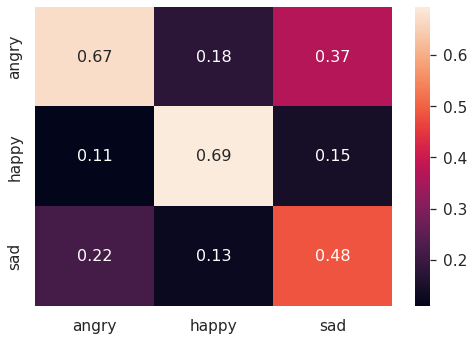

In [ ]:
array = confusion_matrix(y_test_1, y_pred_1 , normalize='pred')
df_cm = pd.DataFrame(array, ["angry", "happy", "sad"], ["angry", "happy", "sad"])
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

## ROC AUC Curve

In [ ]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2
n_classes = 3
# Compute ROC curve and ROC area for each class

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in y_pred.keys():
  predicts = [1 if i==j else 0 for j in y_pred[i]]
  tests = [1] * len(y_pred[i])
  predicts = np.asarray(predicts)
  tests = np.asarray(tests)
  fpr[i], tpr[i], _ = roc_curve(tests,predicts)
  # print(fpr[i], tpr[i])
  roc_auc[i] = auc(fpr[i], tpr[i])
roc_auc

In [ ]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
print(all_fpr)
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

print(mean_tpr)
# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


[0. 1.]
[0. 3.]


<ipython-input-25-af4d66e7033b>:7: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


In [ ]:
# Plot all ROC curves
plt.figure(1)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()